In [1]:
# Libraries
import datetime as dt
import format_database as formatter
import helper as help
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, t
from tqdm import tqdm

# Parameters and variables
XLS_PATH     = "Database.xlsx"
ROLLING_WINDOW = 252 
ASSETS  =  [
    'NATIONAL AUS.BANK - TOT RETURN IND',
    'ASX - TOT RETURN IND',
    'INSURANCE AUS.GROUP - TOT RETURN IND',
    'ORIGIN ENERGY (EX BORAL) - TOT RETURN IND',
    'WOODSIDE ENERGY GROUP - TOT RETURN IND',
    'APA GROUP - TOT RETURN IND',
    'SANTOS - TOT RETURN IND',
    'WASH.H SOUL PATSN.& CO. DFD. - TOT RETURN IND',
    'PRO MEDICUS - TOT RETURN IND',
    'CSL - TOT RETURN IND',
    'REA GROUP - TOT RETURN IND',
    'GOODMAN GROUP - TOT RETURN IND',
    'STOCKLAND STAPLED UNITS - TOT RETURN IND',
    'WOOLWORTHS GROUP - TOT RETURN IND',
    'WESFARMERS - TOT RETURN IND',
    'QANTAS AIRWAYS - TOT RETURN IND',
    'TECHNOLOGY ONE - TOT RETURN IND',
    'TELSTRA GROUP - TOT RETURN IND',
    'FORTESCUE - TOT RETURN IND',
    'RIO TINTO - TOT RETURN IND']



In [2]:
if "TotalReturnIndices" not in pd.ExcelFile(XLS_PATH).sheet_names:
    formatter.create_TotalReturnIndices(
        excel_path    = XLS_PATH,
        chosen_assets = ASSETS
    )

RI_df = pd.read_excel(
    XLS_PATH, 
    sheet_name="TotalReturnIndices")

# Convert DATE to datetime (easier to handle)
RI_df["DATE"] = pd.to_datetime(RI_df["DATE"])
# Set DATE as index
RI_df.set_index("DATE", inplace=True)

# Calculate log-returns
returns_df = 100*np.log(RI_df / RI_df.shift(1)).dropna()

The whole point 2 is computed by a single function, see its description for more information (or take a peek at helper.py).

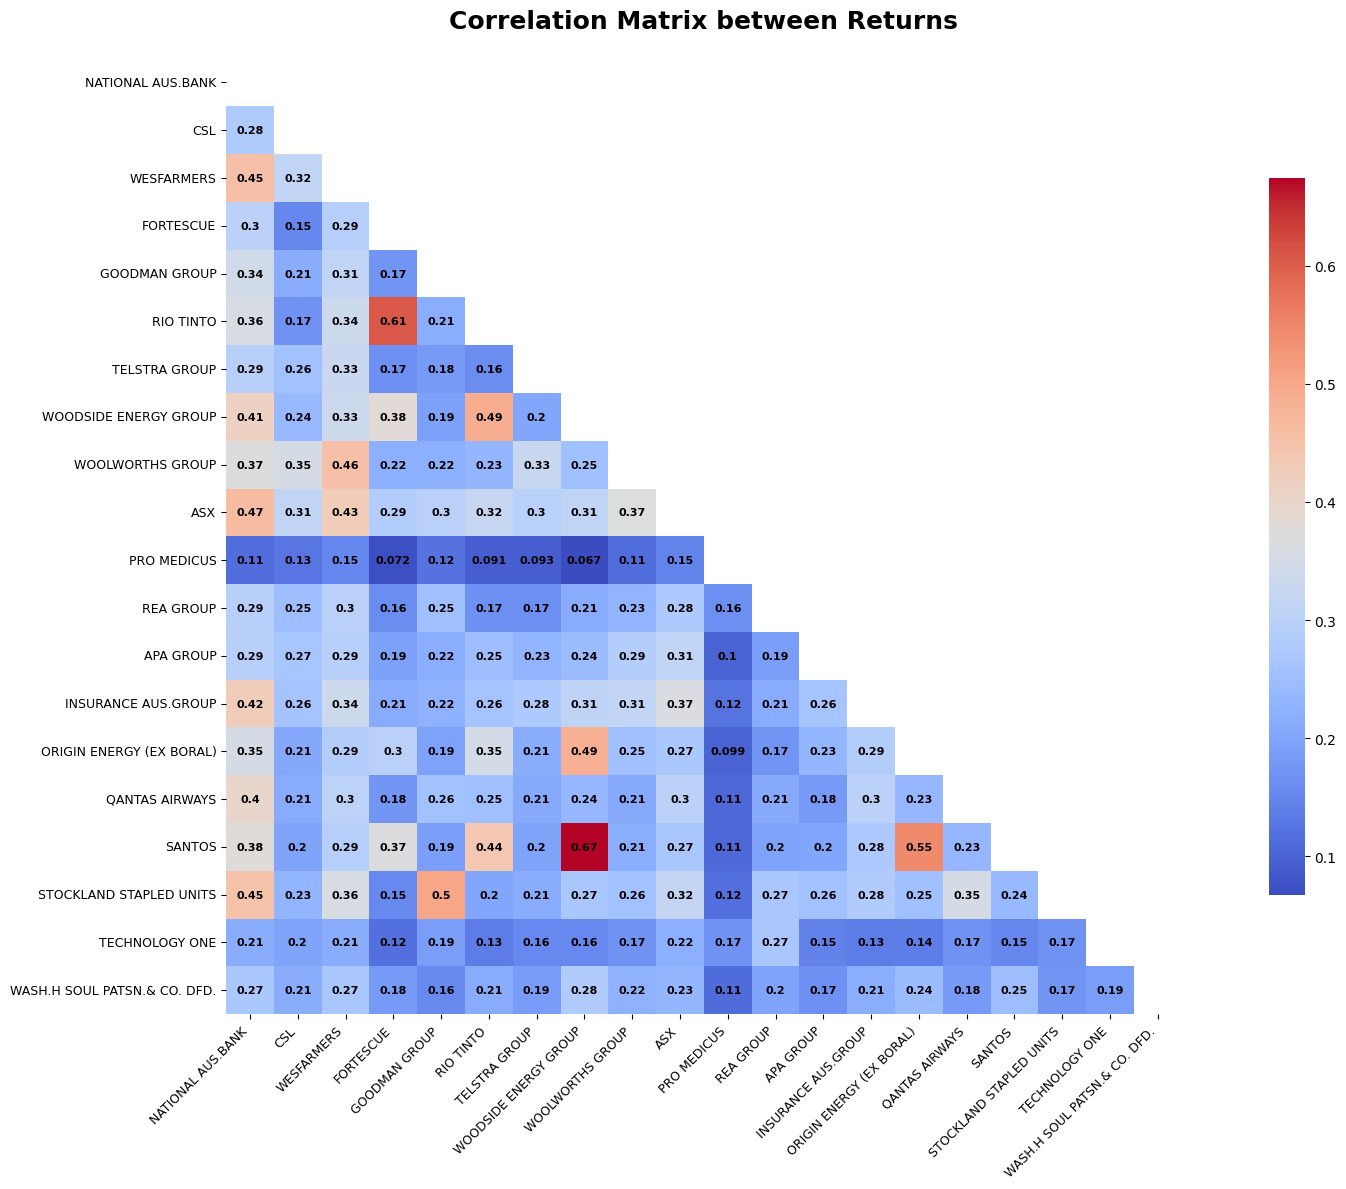

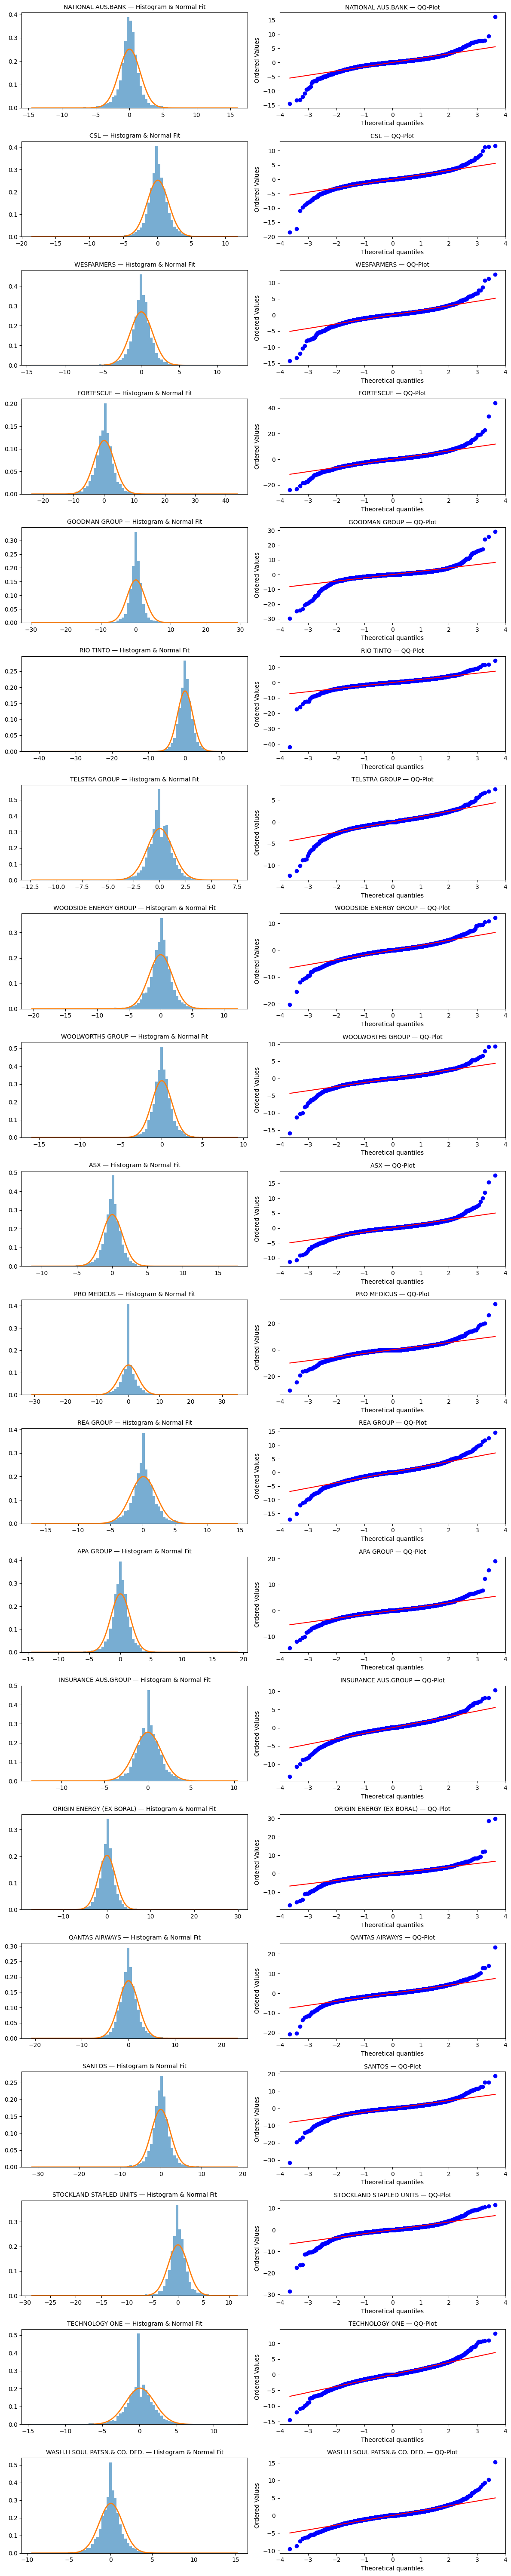

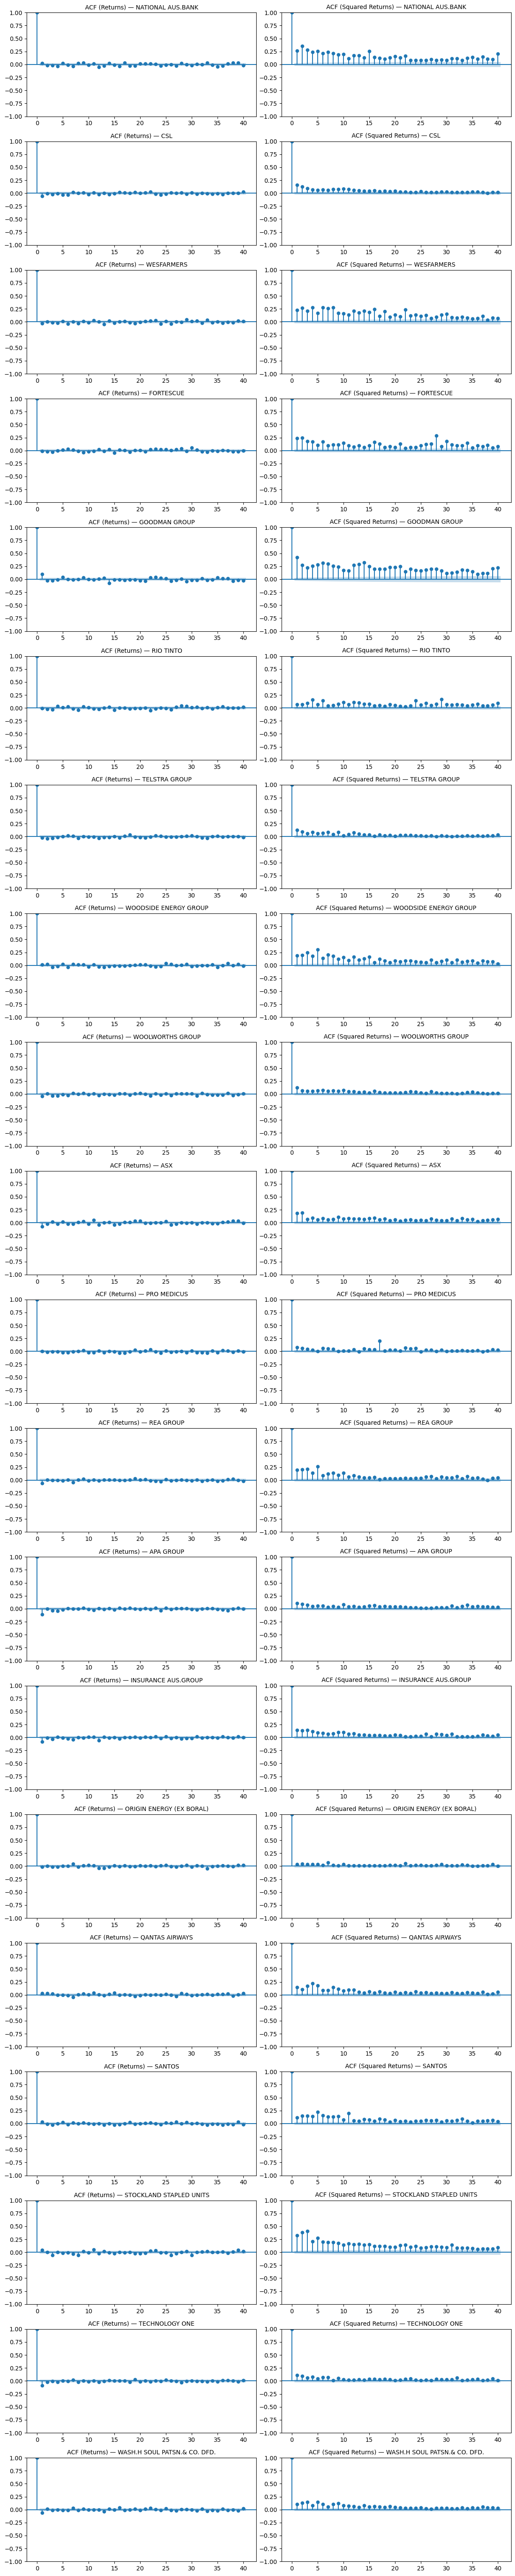

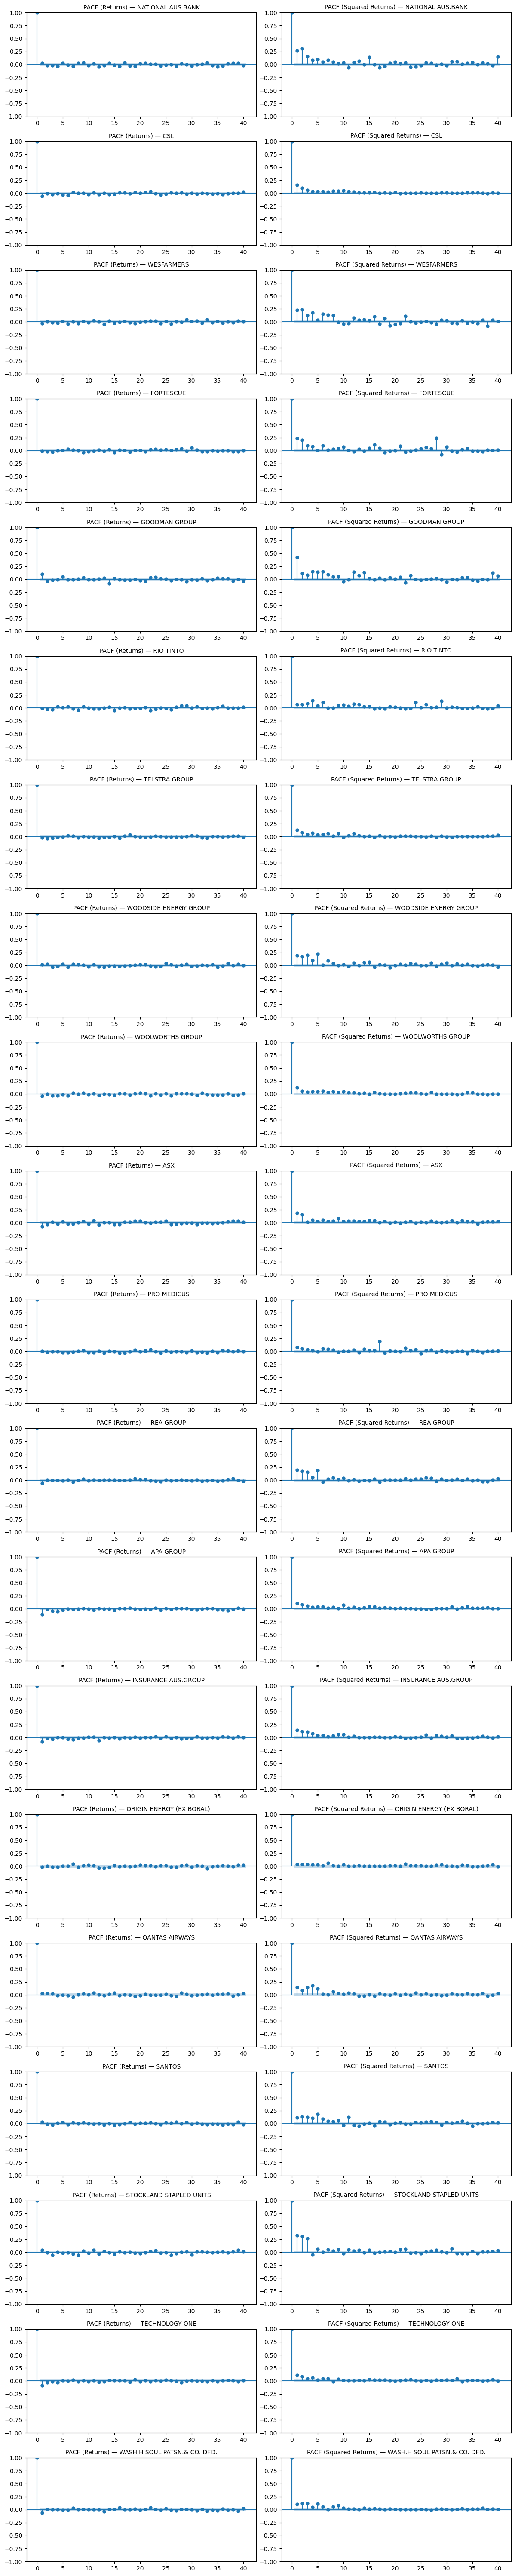

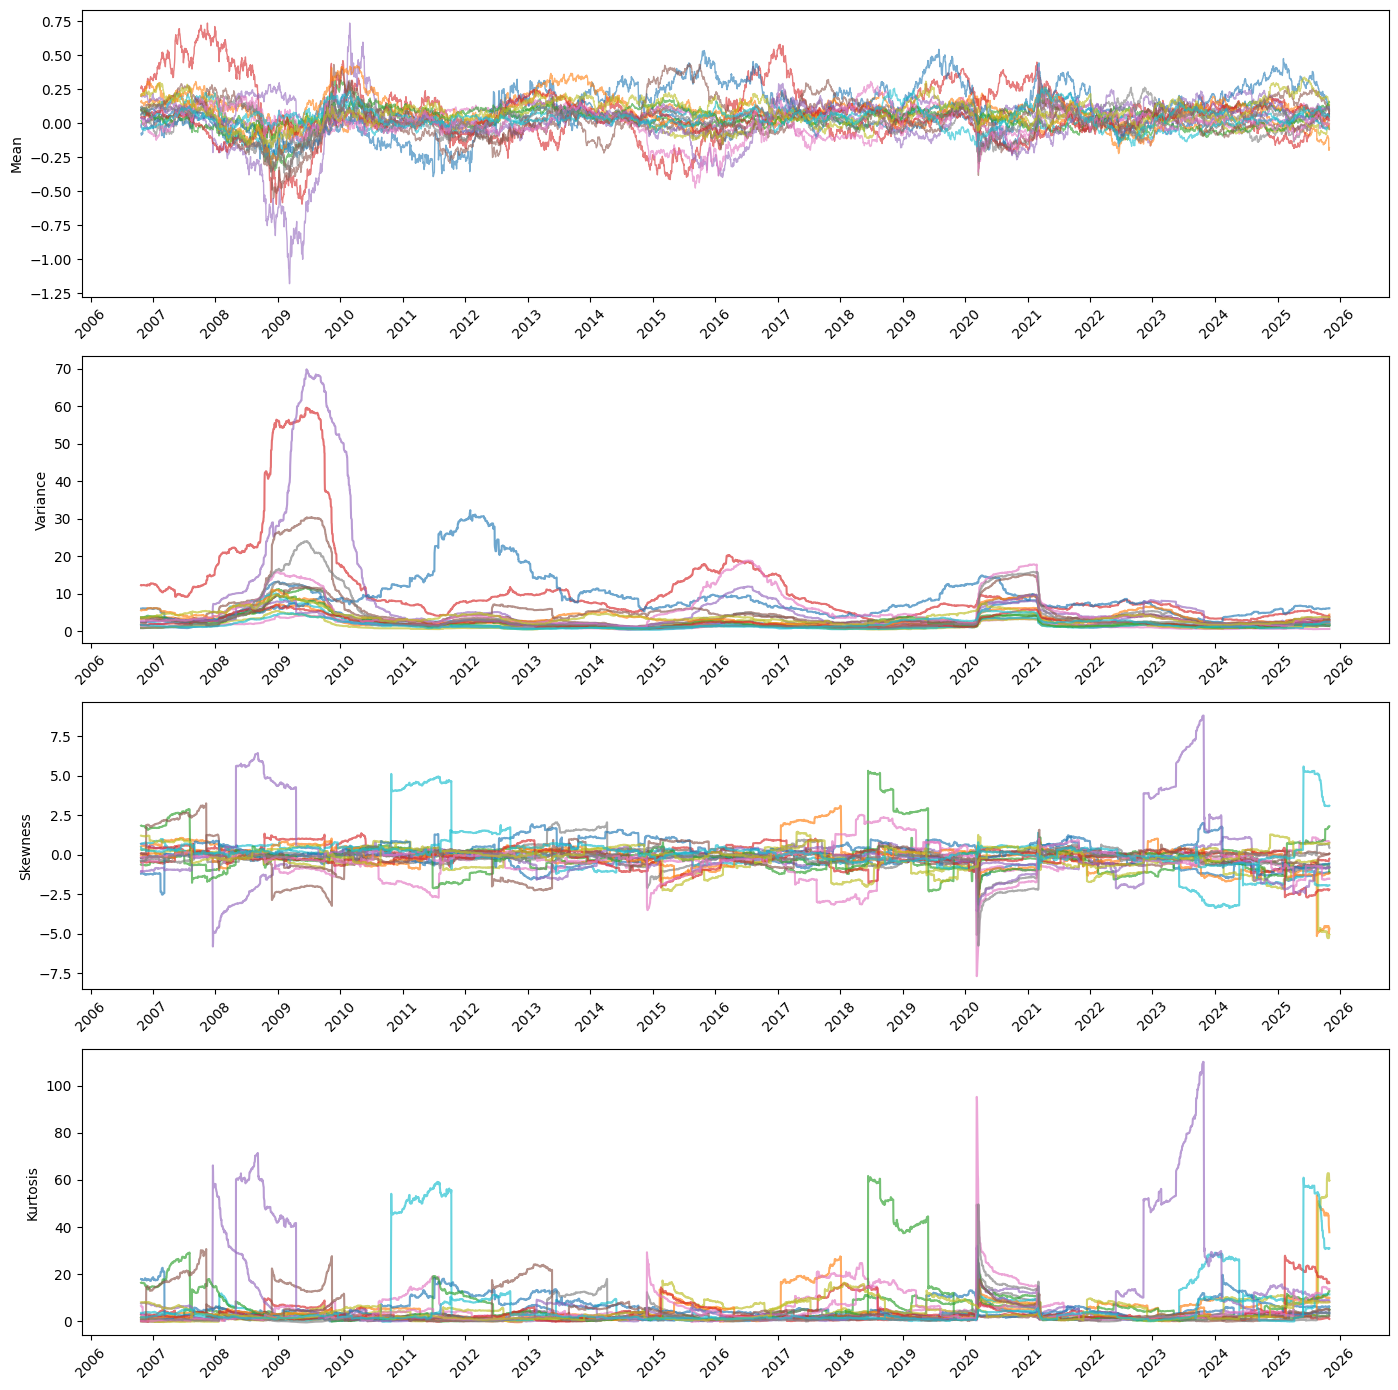

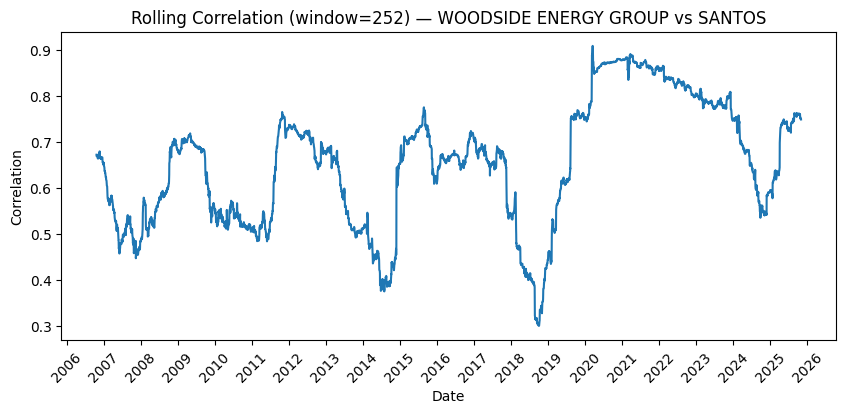

In [3]:
# Display descriptive statistics (more information in function description)
descriptive_stat_df = help.visual_descriptive_statistics(returns_df, plot=False, save=False)

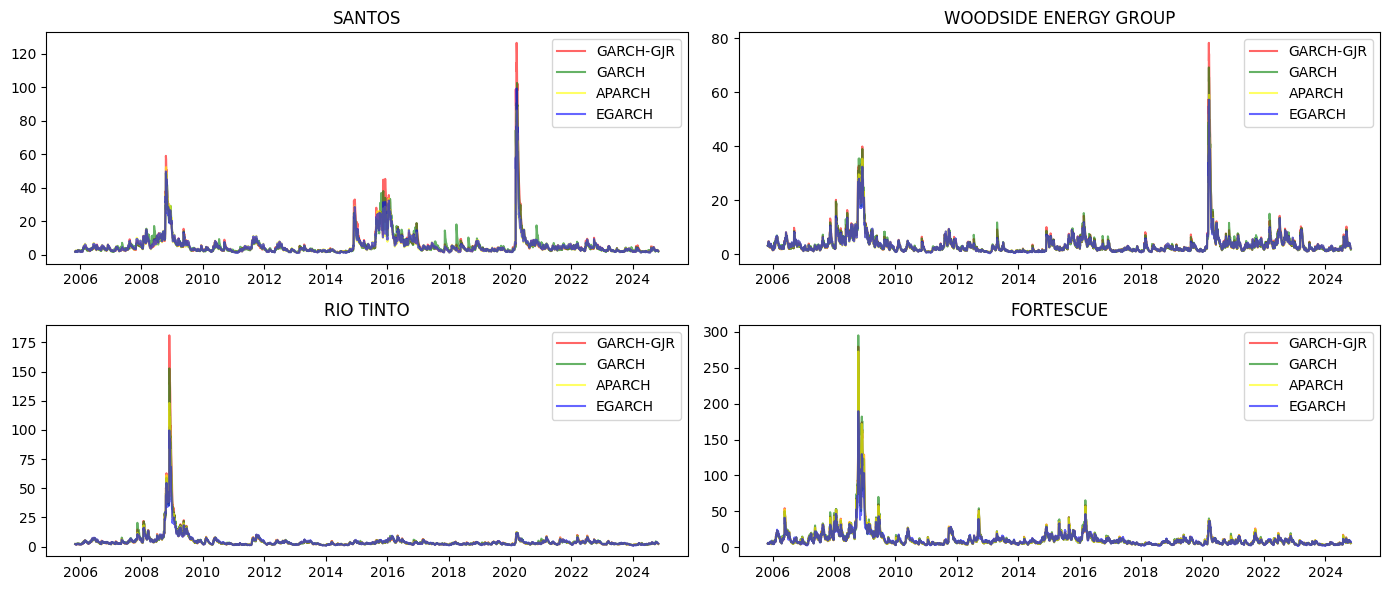

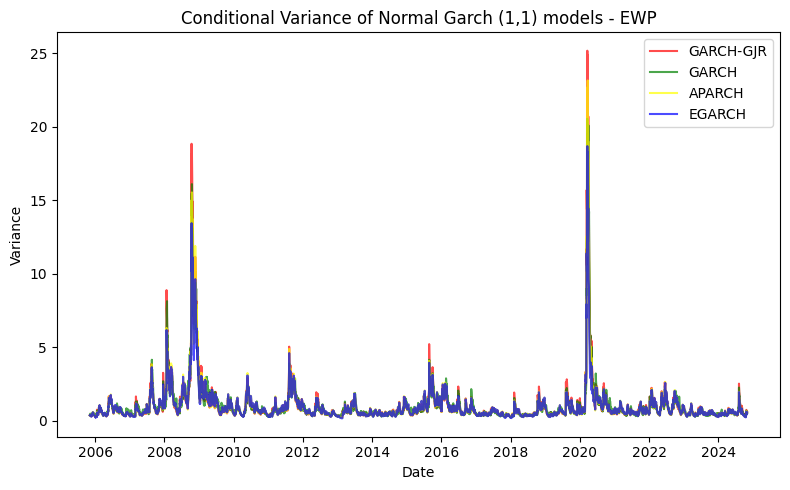

GARCH	AIC : 21199.88, BIC : 21225.91
GARCH-GJR	AIC : 21171.80, BIC : 21204.34
EGARCH	AIC : 21148.36, BIC : 21180.90
APARCH	AIC : 21135.61, BIC : 21174.65
GARCH	AIC : 12728.37, BIC : 12754.40
GARCH-GJR	AIC : 12637.00, BIC : 12669.54
EGARCH	AIC : 12627.83, BIC : 12660.37
APARCH	AIC : 12613.46, BIC : 12652.51


In [4]:
# Split sample (exclude last year)
cutoff_start = dt.datetime(2024, 11, 1)
cutoff_end   = dt.datetime(2025, 10, 31)
train = returns_df.loc[returns_df.index < cutoff_start]
test  = returns_df.loc[(returns_df.index >= cutoff_start) & (returns_df.index <= cutoff_end)]
ewp_full  = returns_df.mean(axis=1)
ewp_train = train.mean(axis=1)
ewp_test  = test.mean(axis=1).rename("EWP")

# Calculate Equal-Weighted Portfolio returns
ewp = train.mean(axis=1)
# Focus analysis on the two pairs of assets with higher correlation
garch_diagnostics = help.univariate_garch_diagnostics(train.filter(items=['SANTOS', 'WOODSIDE ENERGY GROUP', 'RIO TINTO', 'FORTESCUE']), plot=True, save=False)
ewp_garch_results = help.ewp_garch_diagnostics(ewp_train)

for model in garch_diagnostics.keys():
    print(f"{model}\tAIC : {garch_diagnostics[model][0]:.2f}, BIC : {garch_diagnostics[model][1]:.2f}")
for model in ewp_garch_results.keys():
    print(f"{model}\tAIC : {ewp_garch_results[model][0]:.2f}, BIC : {ewp_garch_results[model][1]:.2f}")

Rolling forecasts: 100%|█████████████████████████████████████████| 20/20 [02:09<00:00,  6.48s/asset]



————————————————————————————————————————————————————————————
SUMMARY STATISTICS (α=0.01)


VaR_normal_mean  VaR_t_mean  difference  \
NATIONAL AUS.BANK                     3.07515     4.18716     1.11200   
CSL                                   3.54871     5.00337     1.45466   
WESFARMERS                            2.84438     4.08945     1.24507   
FORTESCUE                             5.16107     7.09758     1.93650   
GOODMAN GROUP                         3.72669     5.06188     1.33518   
RIO TINTO                             3.53719     4.47210     0.93492   
TELSTRA GROUP                         1.95801     2.86709     0.90909   
WOODSIDE ENERGY GROUP                 3.97206     5.29592     1.32386   
WOOLWORTHS GROUP                      2.71740     4.03631     1.31891   
ASX                                   2.87886     4.11542     1.23656   
PRO MEDICUS                           5.59490    19.18272    13.58782   
REA GROUP                             4.07217     6.52641     2.45424   
APA GROUP                             2.83819     4.29199     1.45380   
INSURANCE AUS.GROUP                   3.49051     4.92947     1.43896   
ORIGIN ENERGY (EX BORAL)              3.73950     5.56756     1.82806   
QANTAS AIRWAYS                        3.91626     5.58955     1.67329   
SANTOS                                4.18359     6.00340     1.81981   
STOCKLAND STAPLED UNITS               3.08490     3.95074     0.86584   
TECHNOLOGY ONE                        4.14734     6.47313     2.32579   
WASH.H SOUL PATSN.& CO. DFD.          3.14307     4.77927     1.63620   
EWP                                   1.71523     2.06524     0.35000   

                              ks_p_norm  ks_p_t     df_t  
NATIONAL AUS.BANK               0.00000     0.0  5.95585  
CSL                             0.00000     0.0  5.33566  
WESFARMERS                      0.00000     0.0  5.17898  
FORTESCUE                       0.00005     0.0  5.80547  
GOODMAN GROUP                   0.00000     0.0  6.01804  
RIO TINTO                       0.00007     0.0  7.61541  
TELSTRA GROUP                   0.00000     0.0  4.91054  
WOODSIDE ENERGY GROUP           0.00000     0.0  6.22942  
WOOLWORTHS GROUP                0.00000     0.0  4.73502  
ASX                             0.00000     0.0  5.16692  
PRO MEDICUS                     0.00000     0.0  1.85410  
REA GROUP                       0.00000     0.0  4.06737  
APA GROUP                       0.00000     0.0  4.50710  
INSURANCE AUS.GROUP             0.00000     0.0  5.32195  
ORIGIN ENERGY (EX BORAL)        0.00000     0.0  4.68626  
QANTAS AIRWAYS                  0.00000     0.0  5.18366  
SANTOS                          0.00000     0.0  5.07529  
STOCKLAND STAPLED UNITS         0.00000     0.0  7.23888  
TECHNOLOGY ONE                  0.00000     0.0  4.30315  
WASH.H SOUL PATSN.& CO. DFD.    0.00000     0.0  4.52057  
EWP                             0.00000     0.0  9.50984


Average degrees of freedom (t): 5.39
Normal quantile at α=0.01: -2.326
Student-t quantile at α=0.01: -3.265

————————————————————————————————————————————————————————————
SUMMARY STATISTICS (α=0.05)


VaR_normal_mean  VaR_t_mean  difference  \
NATIONAL AUS.BANK                     2.15562     2.56164     0.40601   
CSL                                   2.50722     3.03069     0.52346   
WESFARMERS                            1.98773     2.43386     0.44613   
FORTESCUE                             3.61194     4.31672     0.70479   
GOODMAN GROUP                         2.60771     3.09584     0.48813   
RIO TINTO                             2.48463     2.83514     0.35051   
TELSTRA GROUP                         1.37594     1.69907     0.32314   
WOODSIDE ENERGY GROUP                 2.81233     3.29832     0.48599   
WOOLWORTHS GROUP                      1.91399     2.38010     0.46610   
ASX                                   2.03072     2.47365     0.44293   
PRO MEDICUS                           3.89118     7.48623     3.59505   
REA GROUP                             2.86589     3.71000     0.84412   
APA GROUP                             2.01122     2.52077     0.50954   
INSURANCE AUS.GROUP                   2.46378     2.98141     0.51763   
ORIGIN ENERGY (EX BORAL)              2.64173     3.28667     0.64494   
QANTAS AIRWAYS                        2.76360     3.36324     0.59965   
SANTOS                                2.96510     3.61522     0.65012   
STOCKLAND STAPLED UNITS               2.16899     2.49203     0.32304   
TECHNOLOGY ONE                        2.90796     3.71646     0.80850   
WASH.H SOUL PATSN.& CO. DFD.          2.20845     2.78222     0.57377   
EWP                                   1.20108     1.33472     0.13364   

                              ks_p_norm  ks_p_t     df_t  
NATIONAL AUS.BANK               0.00000     0.0  5.95585  
CSL                             0.00000     0.0  5.33566  
WESFARMERS                      0.00000     0.0  5.17898  
FORTESCUE                       0.00005     0.0  5.80547  
GOODMAN GROUP                   0.00000     0.0  6.01804  
RIO TINTO                       0.00007     0.0  7.61541  
TELSTRA GROUP                   0.00000     0.0  4.91054  
WOODSIDE ENERGY GROUP           0.00000     0.0  6.22942  
WOOLWORTHS GROUP                0.00000     0.0  4.73502  
ASX                             0.00000     0.0  5.16692  
PRO MEDICUS                     0.00000     0.0  1.85410  
REA GROUP                       0.00000     0.0  4.06737  
APA GROUP                       0.00000     0.0  4.50710  
INSURANCE AUS.GROUP             0.00000     0.0  5.32195  
ORIGIN ENERGY (EX BORAL)        0.00000     0.0  4.68626  
QANTAS AIRWAYS                  0.00000     0.0  5.18366  
SANTOS                          0.00000     0.0  5.07529  
STOCKLAND STAPLED UNITS         0.00000     0.0  7.23888  
TECHNOLOGY ONE                  0.00000     0.0  4.30315  
WASH.H SOUL PATSN.& CO. DFD.    0.00000     0.0  4.52057  
EWP                             0.00000     0.0  9.50984


Average degrees of freedom (t): 5.39
Normal quantile at α=0.05: -1.645
Student-t quantile at α=0.05: -1.983


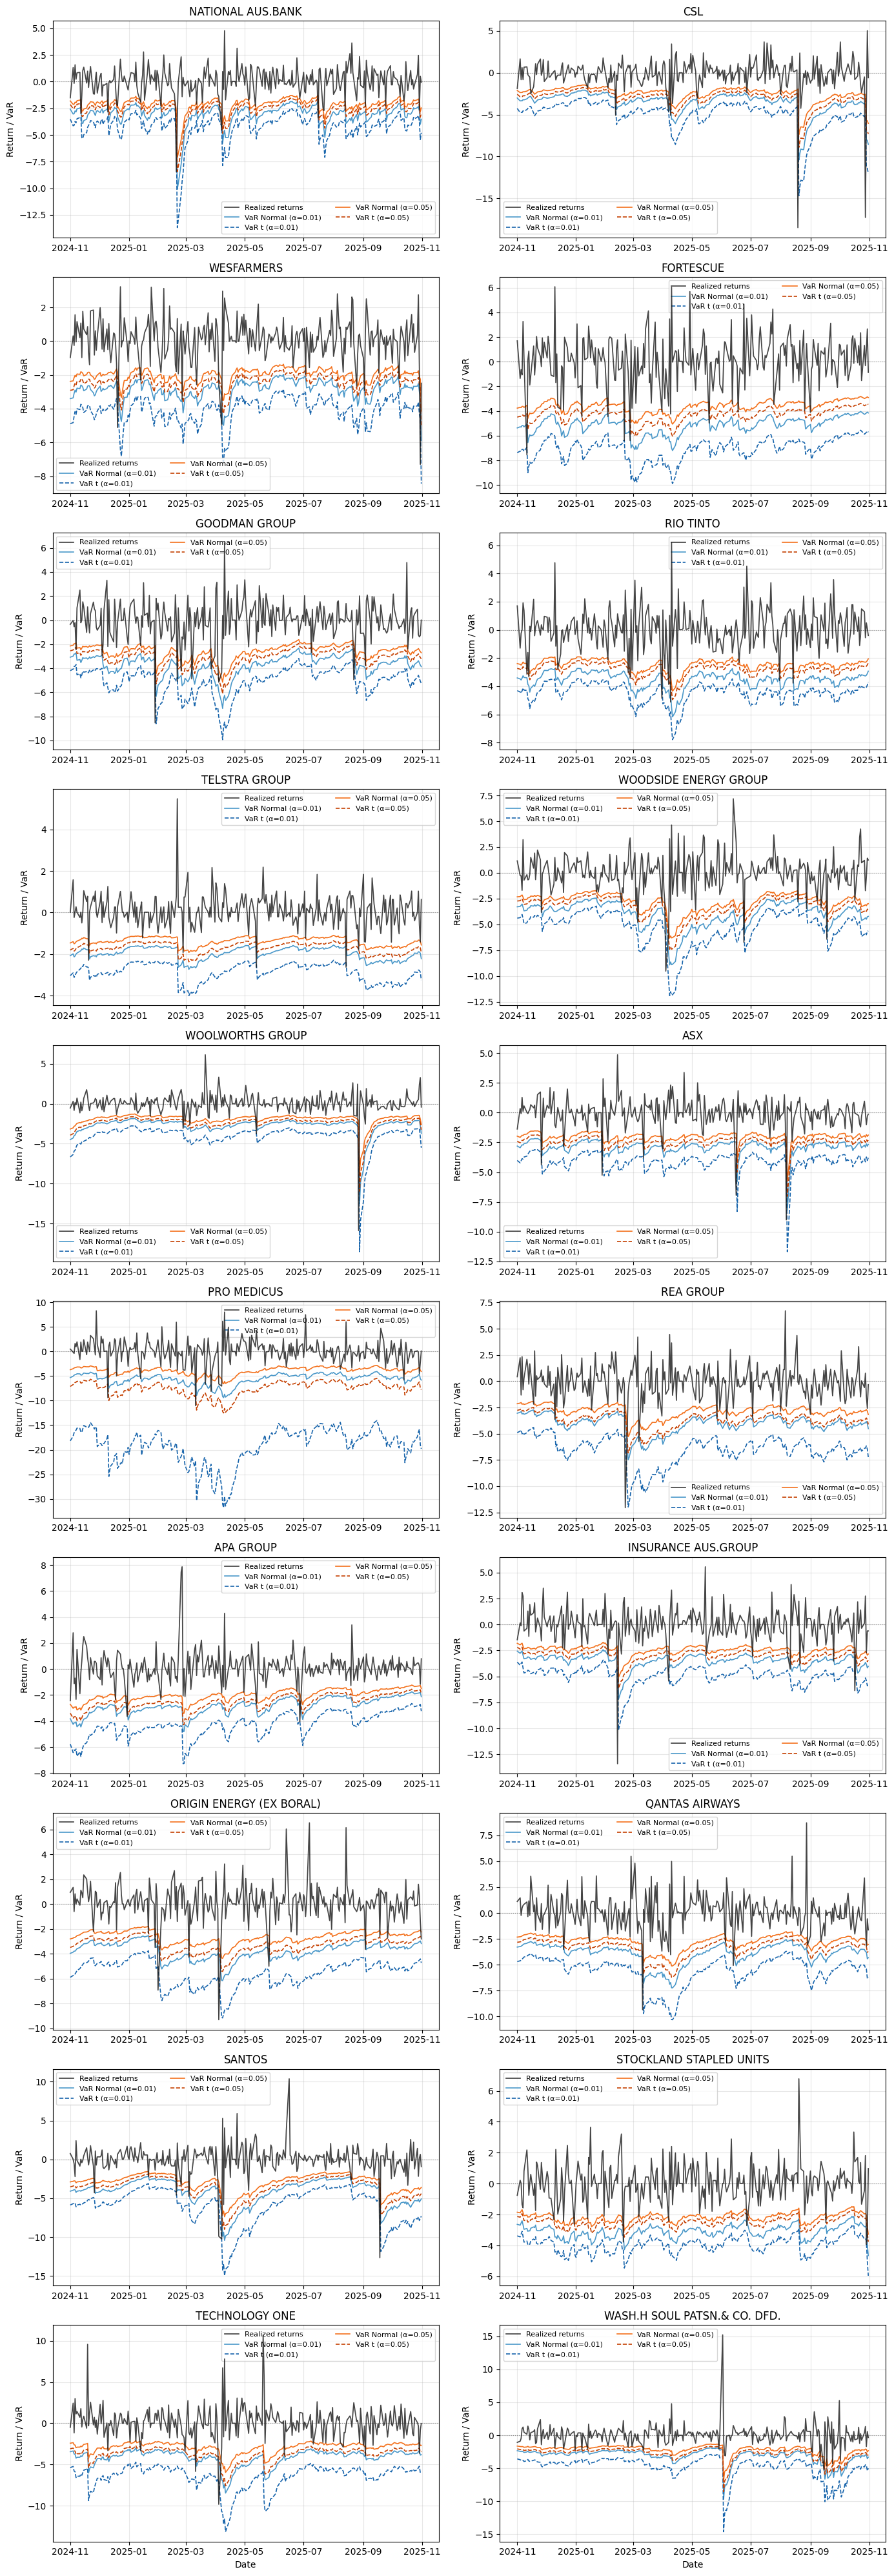

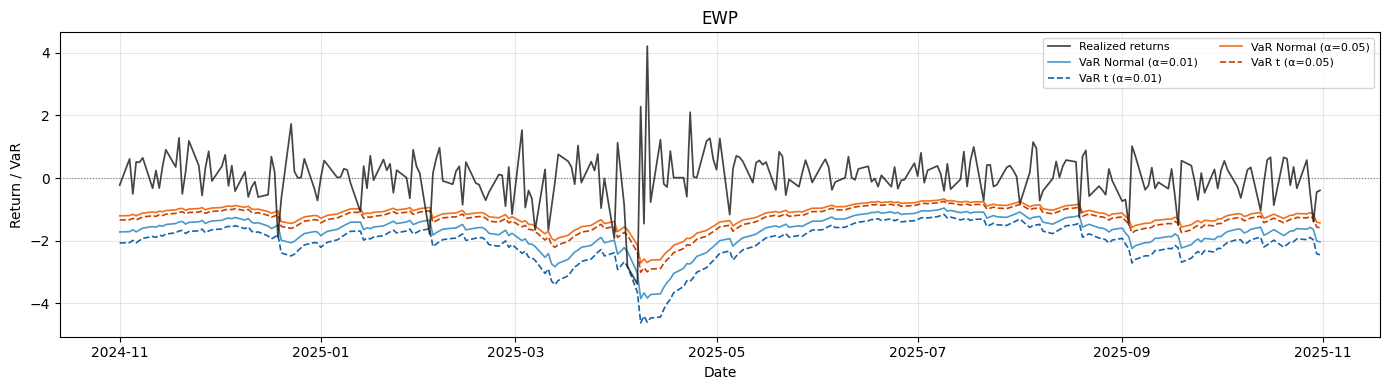

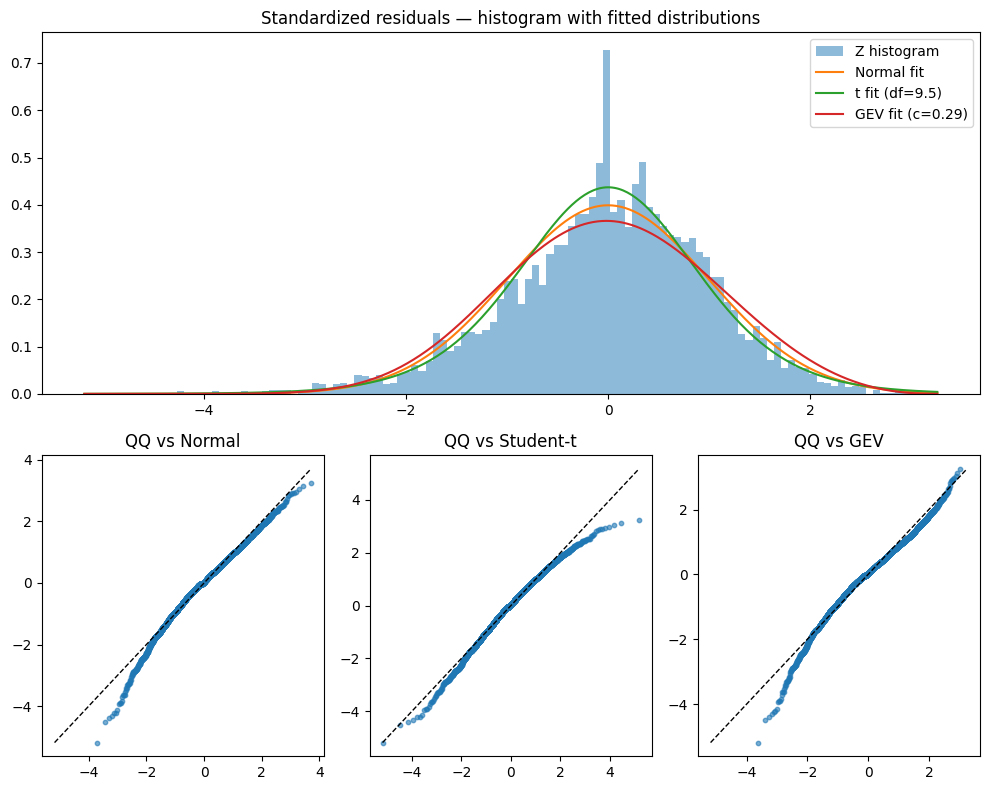

In [8]:
# ——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————— #
# Config
WINDOW = 1750                 # rolling window length (set None to use expanding window)
ALPHA_LIST = [.01, .05]       # VaR confidence level
MODEL_FOR_SIGMA = "EGARCH"    # "EGARCH" or "APARCH"
DIST_FOR_SIGMA = "normal"     # distribution used to estimate sigma (normal is fine)
ASSET_NAMES = list(train.columns)
TEST_DATES = test.index
UNIVARIATE_GARCH_MODELS = ["GARCH", "GARCH-GJR", "EGARCH", "APARCH"]

# ————————————————————————————————————————————————————
# 1) Rolling forecasts per asset
mu_forecasts = pd.DataFrame(index=TEST_DATES, columns=ASSET_NAMES, dtype=float)
sigma2_forecasts = pd.DataFrame(index=TEST_DATES, columns=ASSET_NAMES, dtype=float)

for asset in tqdm(ASSET_NAMES, desc="Rolling forecasts", 
                  unit="asset", ncols=100, colour='green'): 
    mu_f, sigma2_f = help.rolling_forecast_sigma(
        train[asset], test[asset],
        model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA, window=WINDOW
    )
    mu_forecasts[asset] = mu_f
    sigma2_forecasts[asset] = sigma2_f

# ————————————————————————————————————————————————————
# 2) Rolling forecasts for Equal-Weighted Portfolio
mu_ewp, sigma2_ewp = help.rolling_forecast_sigma(
    ewp_train, ewp_test,
    model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA, window=WINDOW
)

# Combine assets and EWP into single DataFrames with MultiIndex columns
all_assets = ASSET_NAMES + ["EWP"]
mu_all = pd.concat([mu_forecasts, mu_ewp.rename("EWP")], axis=1)
sigma2_all = pd.concat([sigma2_forecasts, sigma2_ewp.rename("EWP")], axis=1)

# ————————————————————————————————————————————————————
# 3) Fit residual distributions (Normal vs Student-t)
fit_info = {a: help.fit_residual_distribution(train[a], model_name=MODEL_FOR_SIGMA, dist_for_fit="normal")
            for a in ASSET_NAMES}
fit_info["EWP"] = help.fit_residual_distribution(ewp_train, model_name=MODEL_FOR_SIGMA, dist_for_fit="normal")

# Extract df parameters as dict for vectorized computation
df_params = {a: fit_info[a]['df_t'] for a in all_assets}

# ————————————————————————————————————————————————————
# 4) Compute VaR forecasts with MultiIndex (alpha, asset)
VaR_normal = pd.DataFrame(
    index=TEST_DATES,
    columns=pd.MultiIndex.from_product([ALPHA_LIST, all_assets], names=['alpha', 'asset']),
    dtype=float
)
VaR_t = pd.DataFrame(
    index=TEST_DATES,
    columns=pd.MultiIndex.from_product([ALPHA_LIST, all_assets], names=['alpha', 'asset']),
    dtype=float
)

for alpha in ALPHA_LIST:
    VaR_normal[alpha] = help.compute_VaR(mu_all, sigma2_all, alpha, distribution="normal")
    VaR_t[alpha] = help.compute_VaR(mu_all, sigma2_all, alpha, distribution="student-t", df_param=df_params)

# ————————————————————————————————————————————————————
# 5) Summary statistics (per alpha)
fit_summary = pd.DataFrame({
    "ks_p_norm": [fit_info[a]["ks_norm_p"] for a in all_assets],
    "ks_p_t": [fit_info[a]["ks_t_p"] for a in all_assets],
    "df_t": [fit_info[a]["df_t"] for a in all_assets],
}, index=all_assets)

for alpha in ALPHA_LIST:
    summary = pd.DataFrame({
        "VaR_normal_mean": VaR_normal[alpha].mean(),
        "VaR_t_mean": VaR_t[alpha].mean(),
        "difference": VaR_t[alpha].mean() - VaR_normal[alpha].mean(),
    }, index=all_assets).join(fit_summary)
    
    print("\n" + "—"*60)
    print(f"SUMMARY STATISTICS (α={alpha})")
    display(summary.round(5))
    
    df_mean = fit_summary["df_t"].mean()
    print(f"\nAverage degrees of freedom (t): {df_mean:.2f}")
    print(f"Normal quantile at α={alpha}: {norm.ppf(alpha):.3f}")
    print(f"Student-t quantile at α={alpha}: {t.ppf(alpha, df_mean):.3f}")

# ————————————————————————————————————————————————————
# Plot all assets
help.plot_VaR_estimates(TEST_DATES, test, VaR_normal, VaR_t)
# Plot EWP only
help.plot_VaR_estimates(TEST_DATES, ewp_test, VaR_normal, VaR_t, assets='EWP')

# ————————————————————————————————————————————————————
# 7) Residual analysis for EWP
mdl_ewp = help._make_model(ewp_train, model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
res_ewp = mdl_ewp.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
Z = pd.Series(res_ewp.std_resid, index=ewp_train.index).dropna()
help.plot_std_resid_diagnostics(Z, show=True, save=False)

In [6]:
# ————————————————————————————————————————————————
# POINT 5 — GEV on left tail of standardized residuals (EWP) + one asset plot
# ————————————————————————————————————————————————
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# 1) Standardized residuals Z_t from the SAME in-sample model (EWP only)
mdl_ewp = help._make_model(ewp_train, model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
res_ewp = mdl_ewp.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
Z = pd.Series(res_ewp.std_resid, index=ewp_train.index).dropna()

print(f"Std. residuals length (EWP): {len(Z)}")

# 2) Left tail analysis: Y_t = -Z_t  (so large positives in Y == large losses)
Y = -Z

# 3) Monthly block maxima of Y (block size ~ trading days/month)
Y_mmax = Y.resample("M").max().dropna()
n_blocks = len(Y_mmax)
# empirical block size (median #obs per month in-sample)
block_sizes = Y.resample("M").size()
n_days_block = int(block_sizes.median())

print(f"Monthly blocks: {n_blocks}, median block size (days): {n_days_block}")

# 4) Fit GEV to block maxima (right tail of Y)
c_hat, loc_hat, scale_hat = genextreme.fit(Y_mmax.values)  # shape, loc, scale
print(f"GEV params (shape, loc, scale): {c_hat:.4f}, {loc_hat:.4f}, {scale_hat:.4f}")

# 5) Extremal index θ (Ferro–Segers-style; robust to Index types)
def ferro_segers_theta(series: pd.Series, upper_quantile: float = 0.95) -> float:
    # exceedances over high threshold u
    u = series.quantile(upper_quantile)
    exc_idx = series[series > u].index
    if len(exc_idx) < 2:
        return 1.0  # no clustering detectable

    # convert datetime index to day counts, then take diffs between exceedances
    if isinstance(exc_idx, pd.DatetimeIndex):
        inter_days = exc_idx.to_series().diff().dt.total_seconds().dropna() / 86400.0
    else:
        inter_days = pd.Series(np.diff(np.asarray(exc_idx, dtype=float)))

    if len(inter_days) == 0:
        return 1.0

    m = inter_days.mean()
    v = inter_days.var(ddof=1) if len(inter_days) > 1 else 0.0

    # Ferro–Segers-inspired shrinkage to [0,1]
    theta = m / (m + (v / max(m, 1e-12)))
    return float(np.clip(theta, 0.01, 1.0))

theta_hat = ferro_segers_theta(Y, upper_quantile=0.95)
print(f"Estimated extremal index θ ≈ {theta_hat:.3f}")

# 6) Daily α-quantile of residuals via block GEV:
# For i.i.d.: G(x) = F(x)^n  →  F(x) = G(x)^(1/n)
# Want daily right-tail quantile of Y at level (1-α): set G(y_α) = (1-α)^n
# With clustering: G(y_α) = (1-α)^(n*θ)
alpha = ALPHA  # e.g. 0.05
p_block_ind   = (1.0 - alpha) ** n_days_block             # independence (θ=1)
p_block_theta = (1.0 - alpha) ** (n_days_block * theta_hat)

y_alpha_ind   = genextreme.ppf(p_block_ind,   c_hat, loc_hat, scale_hat)   # quantile for Y = -Z
y_alpha_theta = genextreme.ppf(p_block_theta, c_hat, loc_hat, scale_hat)

# map back to Z left-tail quantiles: q_Z(α) = - y_alpha
qZ_alpha_ind   = -y_alpha_ind
qZ_alpha_theta = -y_alpha_theta

print(f"\nResidual α-quantiles (Z) at α={alpha:.2f}:")
print(f"q_Z (indep)  = {qZ_alpha_ind:.4f}")
print(f"q_Z (with θ) = {qZ_alpha_theta:.4f}")

# 7) Convert residual quantiles into RETURN VaR on the forecasting window
# VaR_t (positive number) = -( μ̂_{t+1} + σ̂_{t+1} * q_Z(α) )
sigma_ewp = np.sqrt(var_ewp)
VaR_ind   = -(mu_ewp + sigma_ewp * qZ_alpha_ind)
VaR_theta = -(mu_ewp + sigma_ewp * qZ_alpha_theta)

# 8) Plots: realized returns vs VaR (with/without θ) — EWP
plt.figure(figsize=(12,5))
plt.plot(ewp_test.index, ewp_test.values, label="Realized EWP returns", color="black", alpha=0.7)
plt.plot(ewp_test.index, -VaR_ind.values,   label=f"VaR (GEV, θ=1), α={alpha:.2f}",   linewidth=1.6)
plt.plot(ewp_test.index, -VaR_theta.values, label=f"VaR (GEV, θ={theta_hat:.2f}), α={alpha:.2f}", linestyle="--", linewidth=1.6)
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title("EWP — Realized returns vs VaR (GEV, with/without extremal index)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()

# 9) Quick diagnostics: QQ-plot of monthly block maxima vs fitted GEV — EWP
Ymax_sorted = np.sort(Y_mmax.values)
u = (np.arange(1, n_blocks+1) - 0.5) / n_blocks
gev_q = genextreme.ppf(u, c_hat, loc_hat, scale_hat)

plt.figure(figsize=(5,5))
plt.scatter(gev_q, Ymax_sorted, s=18, alpha=0.7)
lo = min(gev_q.min(), Ymax_sorted.min()); hi = max(gev_q.max(), Ymax_sorted.max())
plt.plot([lo,hi], [lo,hi], "k--", linewidth=1)
plt.title("QQ-plot — Monthly block maxima of Y = -Z vs fitted GEV (EWP)")
plt.xlabel("GEV quantiles"); plt.ylabel("Empirical block maxima")
plt.tight_layout(); plt.show()

# ————————————————————————————————————————————————
# 10) SAME workflow for one asset: NATIONAL AUS.BANK (minimal addition)
# ————————————————————————————————————————————————
asset_name = "NATIONAL AUS.BANK"
assert asset_name in train.columns, f"{asset_name} not found in train.columns"

# In-sample standardized residuals for that asset (same model settings)
mdl_a = help._make_model(train[asset_name], model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
res_a = mdl_a.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
Z_a = pd.Series(res_a.std_resid, index=train[asset_name].index).dropna()

# Left tail (losses)
Y_a = -Z_a
Y_a_mmax = Y_a.resample("M").max().dropna()
n_blocks_a = len(Y_a_mmax)
block_sizes_a = Y_a.resample("M").size()
n_days_block_a = int(block_sizes_a.median())

# Fit GEV on block maxima for the asset
c_a, loc_a, scale_a = genextreme.fit(Y_a_mmax.values)

# Extremal index for the asset
theta_a = ferro_segers_theta(Y_a, upper_quantile=0.95)

# Daily α-quantile mapping for the asset
p_block_ind_a   = (1.0 - alpha) ** n_days_block_a
p_block_theta_a = (1.0 - alpha) ** (n_days_block_a * theta_a)

y_alpha_ind_a   = genextreme.ppf(p_block_ind_a,   c_a, loc_a, scale_a)
y_alpha_theta_a = genextreme.ppf(p_block_theta_a, c_a, loc_a, scale_a)

qZ_alpha_ind_a   = -y_alpha_ind_a
qZ_alpha_theta_a = -y_alpha_theta_a

# Asset VaR series on forecasting window (use the *per-asset* forecasts already computed)
sigma_a = np.sqrt(var_forecasts[asset_name])
mu_a    = mu_forecasts[asset_name]
VaR_ind_a   = -(mu_a + sigma_a * qZ_alpha_ind_a)
VaR_theta_a = -(mu_a + sigma_a * qZ_alpha_theta_a)

# Plot realized returns vs VaR (with/without θ) — Asset
plt.figure(figsize=(12,5))
plt.plot(test.index, test[asset_name].values, label=f"Realized returns — {asset_name}", color="black", alpha=0.7)
plt.plot(test.index, -VaR_ind_a.values,   label=f"VaR (GEV, θ=1), α={alpha:.2f}", linewidth=1.6)
plt.plot(test.index, -VaR_theta_a.values, label=f"VaR (GEV, θ={theta_a:.2f}), α={alpha:.2f}", linestyle="--", linewidth=1.6)
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title(f"{asset_name} — Realized returns vs VaR (GEV, with/without extremal index)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()


Std. residuals length (EWP): 4955
Monthly blocks: 228, median block size (days): 22
GEV params (shape, loc, scale): 0.0396, 1.8314, 0.6338
Estimated extremal index θ ≈ 0.556


NameError: name 'ALPHA' is not defined

Std. residuals length (EWP): 4955
Threshold u (q=0.95): 1.7170 | exceedances: 248/4955 (p_u=0.0501)
GPD params (xi, beta): -0.0647, 0.6924
Estimated extremal index θ ≈ 0.556

Residual α-quantiles (Z) at α=0.05 via GPD:
q_Z (indep)  = -1.7177
q_Z (with θ) = -1.3029


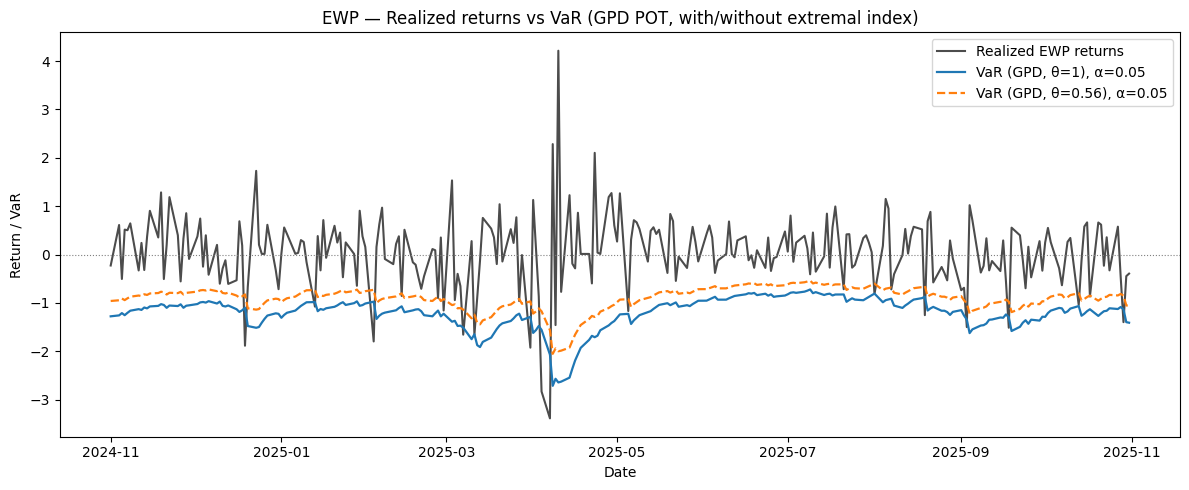

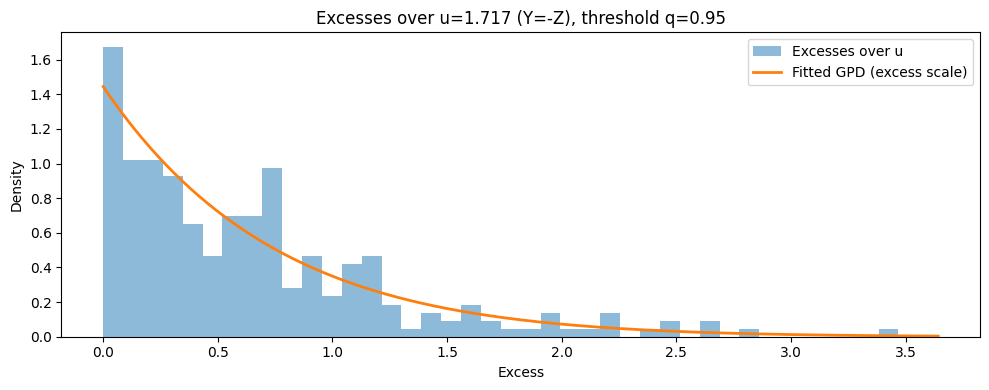

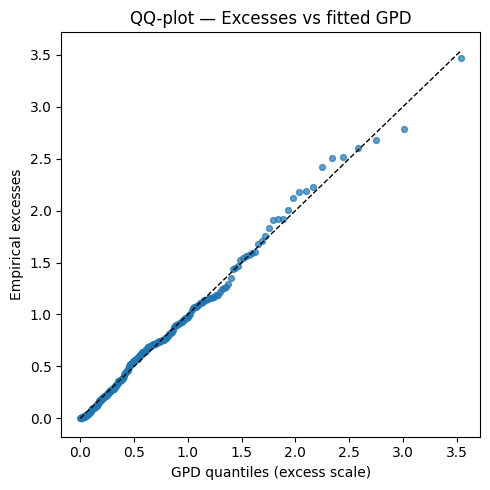

In [ ]:
ALPHA=.05
# ————————————————————————————————————————————————
# POINT 6 — GPD on left tail of standardized residuals (EWP, POT)
# ————————————————————————————————————————————————
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genpareto, norm, t

# 0) Preconditions from Point 4
assert 'ewp_train' in globals() and 'ewp_test' in globals()
assert 'mu_ewp' in globals() and 'var_ewp' in globals()
assert 'MODEL_FOR_SIGMA' in globals() and 'DIST_FOR_SIGMA' in globals()
assert 'ALPHA' in globals() and 'TEST_DATES' in globals()

# ---------- helpers ----------
def ferro_segers_theta(series: pd.Series, upper_quantile: float = 0.95) -> float:
    """Simple θ estimator using inter-exceedance times over a high u."""
    u = series.quantile(upper_quantile)
    exc_idx = series[series > u].index
    if len(exc_idx) < 2:
        return 1.0

    if isinstance(exc_idx, pd.DatetimeIndex):
        inter_days = exc_idx.to_series().diff().dt.total_seconds().dropna() / 86400.0
    else:
        inter_days = pd.Series(np.diff(np.asarray(exc_idx, dtype=float)))

    if len(inter_days) == 0:
        return 1.0

    m = inter_days.mean() 
    v = inter_days.var(ddof=1) if len(inter_days) > 1 else 0.0
    theta = m / (m + (v / max(m, 1e-12)))
    return float(np.clip(theta, 0.01, 1.0))

# ---------- 1) Get standardized residuals Z_t (same in-sample model) ----------
mdl_ewp = help._make_model(ewp_train, model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
res_ewp = mdl_ewp.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
Z = pd.Series(res_ewp.std_resid, index=ewp_train.index).dropna()
print(f"Std. residuals length (EWP): {len(Z)}")

# Left tail for VaR: work on Y = -Z (right tail in Y)
Y = -Z

# ---------- 2) POT setup: choose threshold u and build excesses ----------
U_Q = 0.95            # threshold quantile (tune if needed, e.g. 0.97)
u = Y.quantile(U_Q)
exceed = Y[Y > u]
excess = exceed - u

n = len(Y)
n_exc = len(exceed)
p_u = n_exc / n       # empirical exceedance probability Pr(Y > u)
print(f"Threshold u (q={U_Q:.2f}): {u:.4f} | exceedances: {n_exc}/{n} (p_u={p_u:.4f})")

if n_exc < 30:
    print("Warning: few exceedances above threshold — estimates may be unstable.")

# ---------- 3) Fit GPD to excesses (exceedances over u) ----------
# SciPy's genpareto: shape=c(=xi), loc, scale; we fit on excesses with loc=0
xi_hat, loc_hat, beta_hat = genpareto.fit(excess.values, floc=0.0)
print(f"GPD params (xi, beta): {xi_hat:.4f}, {beta_hat:.4f}")

# ---------- 4) Extremal index θ (same tail as threshold) ----------
theta_hat = ferro_segers_theta(Y, upper_quantile=U_Q)
print(f"Estimated extremal index θ ≈ {theta_hat:.3f}")

# ---------- 5) Residual (Z) α-quantile via GPD, with and without θ ----------
# Survival above y > u in Y: S(y) ≈ p_u * (1 + xi*(y-u)/beta)^(-1/xi)
# Solve for y given S(y)=alpha_Y. For VaR at left-tail α on Z, we need right-tail α on Y.
alpha = ALPHA

def gpd_quantile_from_tail(alpha_tail, u, p_u, xi, beta, theta=1.0):
    # effective tail frequency: θ * p_u
    p_eff = max(theta * p_u, 1e-12)
    # target survival ratio r = alpha_tail / p_eff
    r = max(alpha_tail / p_eff, 1e-12)
    if xi == 0:
        # Exponential limit: y = u + beta * log(1/r)
        return u + beta * np.log(1.0 / r)
    else:
        return u + (beta / xi) * (r**(-xi) - 1.0)

# y_alpha for Y (right tail), then map back to Z: q_Z(α) = - y_alpha
y_alpha_ind   = gpd_quantile_from_tail(alpha, u, p_u, xi_hat, beta_hat, theta=1.0)
y_alpha_theta = gpd_quantile_from_tail(alpha, u, p_u, xi_hat, beta_hat, theta=theta_hat)

qZ_alpha_ind   = -y_alpha_ind
qZ_alpha_theta = -y_alpha_theta

print(f"\nResidual α-quantiles (Z) at α={alpha:.2f} via GPD:")
print(f"q_Z (indep)  = {qZ_alpha_ind:.4f}")
print(f"q_Z (with θ) = {qZ_alpha_theta:.4f}")

# ---------- 6) Convert residual quantiles into RETURN VaR on forecast window ----------
# VaR_t (positive) = -( μ̂_{t+1} + σ̂_{t+1} * q_Z(α) )
sigma_ewp = np.sqrt(var_ewp)
VaR_gpd_ind   = -(mu_ewp + sigma_ewp * qZ_alpha_ind)
VaR_gpd_theta = -(mu_ewp + sigma_ewp * qZ_alpha_theta)

# ---------- 7) Plots ----------
# (a) Realized returns vs GPD VaR (with/without θ)
plt.figure(figsize=(12,5))
plt.plot(ewp_test.index, ewp_test.values, label="Realized EWP returns", color="black", alpha=0.7)
plt.plot(ewp_test.index, -VaR_gpd_ind.values,   label=f"VaR (GPD, θ=1), α={alpha:.2f}",   linewidth=1.6)
plt.plot(ewp_test.index, -VaR_gpd_theta.values, label=f"VaR (GPD, θ={theta_hat:.2f}), α={alpha:.2f}", linestyle="--", linewidth=1.6)
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title("EWP — Realized returns vs VaR (GPD POT, with/without extremal index)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()

# (b) POT diagnostics: histogram of excesses & fitted GPD density on excess scale
xs = np.linspace(0, excess.max()*1.05 if n_exc>0 else 1.0, 400)
plt.figure(figsize=(10,4))
plt.hist(excess.values, bins=min(40, max(10, n_exc//5)), density=True, alpha=0.5, label="Excesses over u")
plt.plot(xs, genpareto.pdf(xs, xi_hat, loc=0.0, scale=beta_hat), lw=2, label="Fitted GPD (excess scale)")
plt.title(f"Excesses over u={u:.3f} (Y=-Z), threshold q={U_Q:.2f}")
plt.xlabel("Excess"); plt.ylabel("Density")
plt.legend(); plt.tight_layout(); plt.show()

# (c) POT QQ-plot: empirical excesses vs fitted GPD
ex_sorted = np.sort(excess.values)
m = len(ex_sorted)
if m >= 5:
    u_grid = (np.arange(1, m+1) - 0.5) / m
    gpd_q = genpareto.ppf(u_grid, xi_hat, loc=0.0, scale=beta_hat)
    lo = min(gpd_q.min(), ex_sorted.min())
    hi = max(gpd_q.max(), ex_sorted.max())
    plt.figure(figsize=(5,5))
    plt.scatter(gpd_q, ex_sorted, s=18, alpha=0.7)
    plt.plot([lo,hi], [lo,hi], "k--", linewidth=1)
    plt.title("QQ-plot — Excesses vs fitted GPD")
    plt.xlabel("GPD quantiles (excess scale)"); plt.ylabel("Empirical excesses")
    plt.tight_layout(); plt.show()
else:
    print("QQ-plot skipped: not enough excesses.")


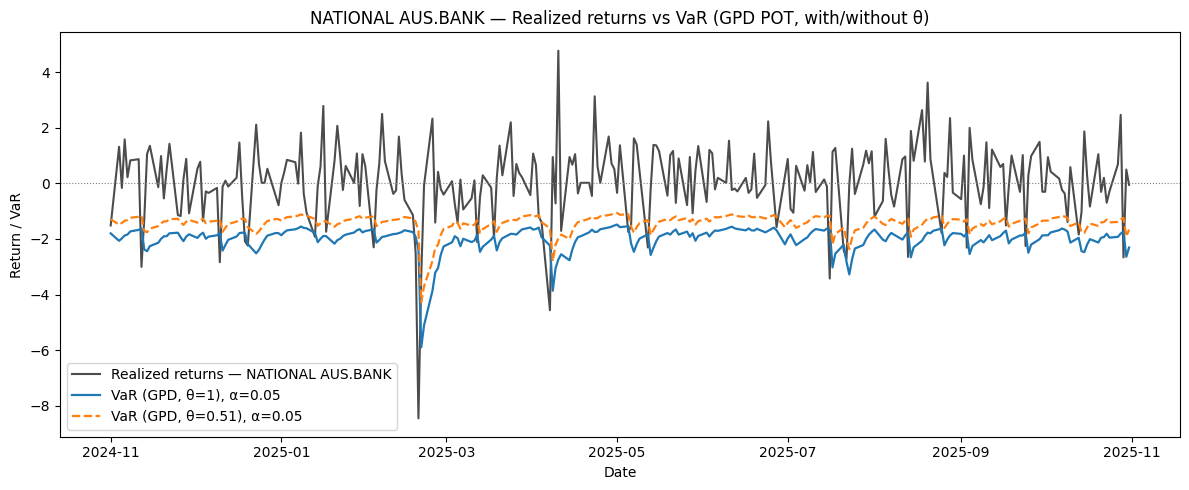

[NATIONAL AUS.BANK] POT threshold u=1.6848, exceedances=248/4955 (p_u=0.0501), GPD xi=0.0278, beta=0.6847, θ≈0.508
[NATIONAL AUS.BANK] q_Z (indep)=-1.6855, q_Z (θ)=-1.2267


In [ ]:
# ————————————————————————————————————————————————
# EXTRA: VaR (GPD POT) plot for NATIONAL AUS.BANK
# ————————————————————————————————————————————————
# Preconditions: uses functions/objects defined in the POINT 6 cell:
# ferro_segers_theta(), MODEL_FOR_SIGMA, DIST_FOR_SIGMA, ALPHA,
# train, test, mu_forecasts, var_forecasts, help._make_model

ASSET_NAME = "NATIONAL AUS.BANK"
assert ASSET_NAME in train.columns, f"{ASSET_NAME} not found in train.columns"
assert ASSET_NAME in mu_forecasts.columns and ASSET_NAME in var_forecasts.columns, \
    "Need mu_forecasts/var_forecasts for the asset from Point 4"

# 1) Standardized residuals for the asset (in-sample only)
mdl_a = help._make_model(train[ASSET_NAME].dropna(),
                         model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
res_a = mdl_a.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
Z_a = pd.Series(res_a.std_resid, index=train[ASSET_NAME].dropna().index).dropna()

# 2) Left tail (losses): Y_a = -Z_a
Y_a = -Z_a

# 3) POT threshold and excesses (use same U_Q as EWP block)
U_Q_asset = 0.95
u_a = Y_a.quantile(U_Q_asset)
exceed_a = Y_a[Y_a > u_a]
excess_a = exceed_a - u_a

n_a = len(Y_a)
n_exc_a = len(exceed_a)
p_u_a = n_exc_a / n_a

# 4) Fit GPD on asset excesses
xi_a, loc_a, beta_a = genpareto.fit(excess_a.values, floc=0.0)

# 5) Extremal index θ for the asset (same tail)
theta_a = ferro_segers_theta(Y_a, upper_quantile=U_Q_asset)

# 6) Asset residual α-quantile via GPD (with and without θ)
alpha = ALPHA

def _gpd_q(alpha_tail, u, p_u, xi, beta, theta=1.0):
    p_eff = max(theta * p_u, 1e-12)
    r = max(alpha_tail / p_eff, 1e-12)
    if xi == 0:
        return u + beta * np.log(1.0 / r)
    else:
        return u + (beta / xi) * (r**(-xi) - 1.0)

yalpha_ind_a   = _gpd_q(alpha, u_a, p_u_a, xi_a, beta_a, theta=1.0)
yalpha_theta_a = _gpd_q(alpha, u_a, p_u_a, xi_a, beta_a, theta=theta_a)
qZ_ind_a       = -yalpha_ind_a
qZ_theta_a     = -yalpha_theta_a

# 7) Turn residual quantiles into asset VaR series over the forecast window
mu_a    = mu_forecasts[ASSET_NAME].astype(float)
sigma_a = np.sqrt(var_forecasts[ASSET_NAME].astype(float))

VaR_gpd_ind_a   = -(mu_a + sigma_a * qZ_ind_a)
VaR_gpd_theta_a = -(mu_a + sigma_a * qZ_theta_a)

# 8) Plot: realized vs VaR (asset)
plt.figure(figsize=(12,5))
plt.plot(test.index, test[ASSET_NAME].values, label=f"Realized returns — {ASSET_NAME}",
         color="black", alpha=0.7)
plt.plot(test.index, -VaR_gpd_ind_a.values,   label=f"VaR (GPD, θ=1), α={alpha:.2f}", linewidth=1.6)
plt.plot(test.index, -VaR_gpd_theta_a.values, label=f"VaR (GPD, θ={theta_a:.2f}), α={alpha:.2f}",
         linestyle="--", linewidth=1.6)
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title(f"{ASSET_NAME} — Realized returns vs VaR (GPD POT, with/without θ)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()

print(f"[{ASSET_NAME}] POT threshold u={u_a:.4f}, exceedances={n_exc_a}/{n_a} (p_u={p_u_a:.4f}), "
      f"GPD xi={xi_a:.4f}, beta={beta_a:.4f}, θ≈{theta_a:.3f}")
print(f"[{ASSET_NAME}] q_Z (indep)={qZ_ind_a:.4f}, q_Z (θ)={qZ_theta_a:.4f}")



POINT 7 — mean VaR across test window (per asset):


GEV_ind_meanVaR  GEV_theta_meanVaR  \
NATIONAL AUS.BANK                1.955200e+00       2.523800e+00   
CSL                              2.191800e+00       2.748800e+00   
WESFARMERS                       1.891300e+00       2.451800e+00   
FORTESCUE                       8.355317e+151      1.055415e+152   
GOODMAN GROUP                    2.631000e+00       3.363000e+00   
RIO TINTO                        2.413400e+00       3.018100e+00   
TELSTRA GROUP                    3.342289e+07       4.564276e+07   
WOODSIDE ENERGY GROUP            2.713100e+00       3.373200e+00   
WOOLWORTHS GROUP                 1.617200e+00       2.134600e+00   
ASX                              1.932800e+00       2.441300e+00   
PRO MEDICUS                      3.354300e+00       4.693800e+00   
REA GROUP                        2.744100e+00       3.487500e+00   
APA GROUP                        1.699100e+00       2.161400e+00   
INSURANCE AUS.GROUP              6.759500e+00       7.404100e+00   
ORIGIN ENERGY (EX BORAL)         2.377800e+00       3.179600e+00   
QANTAS AIRWAYS                   2.534400e+00       3.129200e+00   
SANTOS                           4.002700e+00       5.104800e+00   
STOCKLAND STAPLED UNITS          2.593359e+83       3.181205e+83   
TECHNOLOGY ONE                   2.697900e+00       3.429500e+00   
WASH.H SOUL PATSN.& CO. DFD.     3.627748e+30       4.491348e+30   

                              GPD_ind_meanVaR  
NATIONAL AUS.BANK                2.000400e+00  
CSL                              2.214300e+00  
WESFARMERS                       1.996700e+00  
FORTESCUE                       8.394711e+151  
GOODMAN GROUP                    2.724700e+00  
RIO TINTO                        2.446300e+00  
TELSTRA GROUP                    3.473144e+07  
WOODSIDE ENERGY GROUP            2.710700e+00  
WOOLWORTHS GROUP                 1.688600e+00  
ASX                              1.968000e+00  
PRO MEDICUS                      3.583500e+00  
REA GROUP                        2.773600e+00  
APA GROUP                        1.796400e+00  
INSURANCE AUS.GROUP              6.826400e+00  
ORIGIN ENERGY (EX BORAL)         2.532500e+00  
QANTAS AIRWAYS                   2.555600e+00  
SANTOS                           4.060100e+00  
STOCKLAND STAPLED UNITS          2.697053e+83  
TECHNOLOGY ONE                   2.632100e+00  
WASH.H SOUL PATSN.& CO. DFD.     3.529671e+30

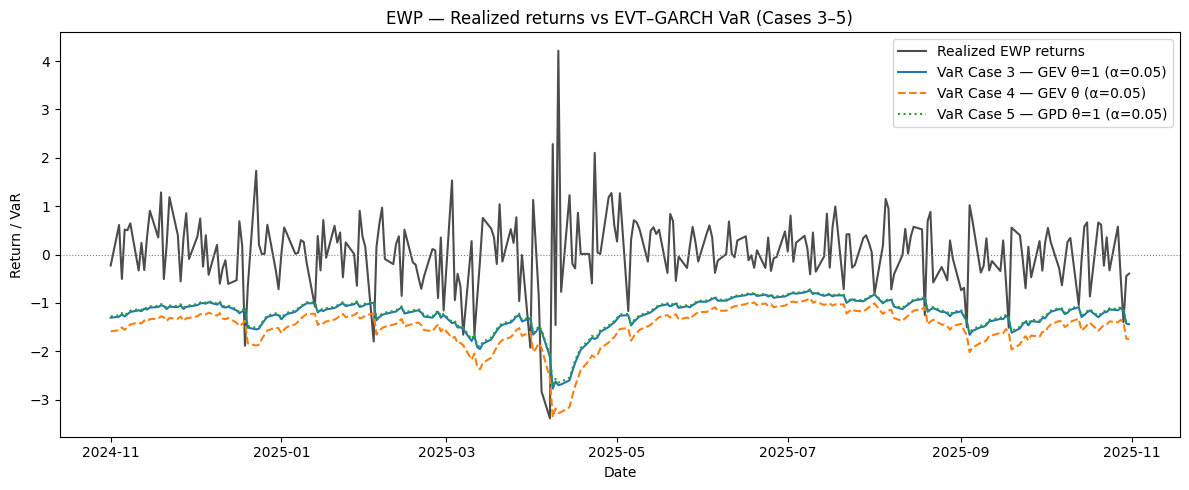

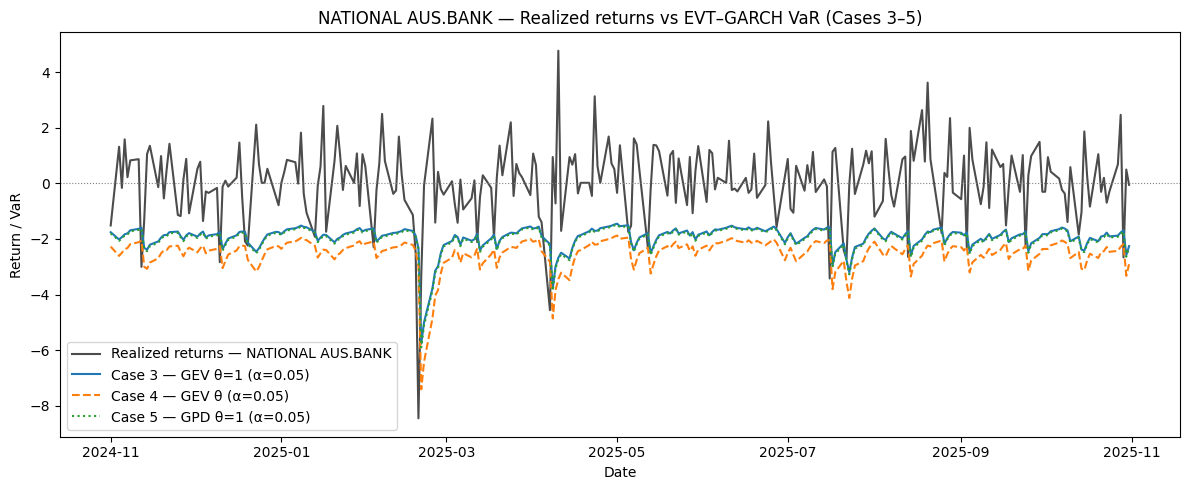

In [ ]:
# ————————————————————————————————————————————————
# POINT 7 — Combine in-sample EVT tail quantiles with GARCH σ̂ to get VaR (Cases 3–5)
# ————————————————————————————————————————————————
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto

# Preconditions from earlier points
assert 'train' in globals() and 'test' in globals()
assert 'mu_forecasts' in globals() and 'var_forecasts' in globals()
assert 'ewp_train' in globals() and 'ewp_test' in globals()
assert 'mu_ewp' in globals() and 'var_ewp' in globals()
assert 'MODEL_FOR_SIGMA' in globals() and 'DIST_FOR_SIGMA' in globals()
assert 'ALPHA' in globals() and 'TEST_DATES' in globals()

ASSET_NAMES = list(train.columns)
alpha = ALPHA           # e.g., 0.05
U_Q   = 0.95            # POT threshold quantile for GPD (can tune)
BLOCK_FREQ = "M"        # monthly block maxima for GEV

# ---------- helper: extremal index (θ) on right tail of Y = -Z ----------
def ferro_segers_theta(series: pd.Series, upper_quantile: float = 0.95) -> float:
    u = series.quantile(upper_quantile)
    exc_idx = series[series > u].index
    if len(exc_idx) < 2:
        return 1.0
    if isinstance(exc_idx, pd.DatetimeIndex):
        inter_days = exc_idx.to_series().diff().dt.total_seconds().dropna() / 86400.0
    else:
        inter_days = pd.Series(np.diff(np.asarray(exc_idx, dtype=float)))
    if len(inter_days) == 0:
        return 1.0
    m = inter_days.mean()
    v = inter_days.var(ddof=1) if len(inter_days) > 1 else 0.0
    theta = m / (m + (v / max(m, 1e-12)))
    return float(np.clip(theta, 0.01, 1.0))

# ---------- 1) In-sample EVT parameters for each asset and EWP ----------
evt_params = {}

names_plus_ewp = ASSET_NAMES + ['EWP']
series_map = {a: train[a].dropna() for a in ASSET_NAMES}
series_map['EWP'] = ewp_train.dropna()

for name in names_plus_ewp:
    # Fit the same GARCH spec in-sample to get standardized residuals Z
    mdl = help._make_model(series_map[name], model_name=MODEL_FOR_SIGMA, dist=DIST_FOR_SIGMA)
    res = mdl.fit(disp="off", show_warning=False, tol=1e-6, options={"maxiter": 500})
    Z   = pd.Series(res.std_resid, index=series_map[name].index).dropna()
    Y   = -Z  # right tail corresponds to left tail of Z (losses)

    # --- GEV (block maxima of Y) ---
    Y_mmax = Y.resample(BLOCK_FREQ).max().dropna()
    if len(Y_mmax) < 6:
        # too few blocks — fall back to a lighter block setup
        Y_mmax = Y.rolling(22, min_periods=1).max().dropna()
    # median block size n (use realized daily obs per block)
    block_sizes = Y.resample(BLOCK_FREQ).size()
    n_days_block = int(max(1, block_sizes.median()))
    c_hat, loc_hat, scale_hat = genextreme.fit(Y_mmax.values)  # shape, loc, scale
    theta_hat = ferro_segers_theta(Y, upper_quantile=0.95)

    # store GEV params
    evt_params[name] = {
        'GEV': {
            'c': c_hat, 'loc': loc_hat, 'scale': scale_hat, 'n_block': n_days_block, 'theta': theta_hat
        }
    }

    # --- GPD (POT on Y) ---
    u = Y.quantile(U_Q)
    exceed = Y[Y > u]
    excess = (exceed - u).values
    p_u = len(exceed) / max(1, len(Y))
    if len(exceed) >= 20:
        xi_hat, loc_hat_gpd, beta_hat = genpareto.fit(excess, floc=0.0)
    else:
        # crude fallback if few exceedances — exponential-ish tail
        xi_hat, beta_hat = 0.0, (excess.mean() if len(exceed) > 0 else 1.0)
    evt_params[name]['GPD'] = {
        'u': float(u), 'p_u': float(p_u), 'xi': float(xi_hat), 'beta': float(beta_hat), 'theta': theta_hat
    }

# ---------- 2) Convert EVT residual quantiles into return VaR time series ----------

def qZ_from_GEV(params: dict, alpha: float, use_theta: bool) -> float:
    """
    Return q_Z(α) for the left tail of Z using block GEV on Y=-Z.
    For independence:   G(yα) = (1-α)^{n}
    With clustering θ:  G(yα) = (1-α)^{n·θ}
    Then q_Z = - yα
    """
    c, loc, scale, n_block, theta = params['c'], params['loc'], params['scale'], params['n_block'], params['theta']
    p = (1.0 - alpha) ** (n_block * (theta if use_theta else 1.0))
    y_alpha = genextreme.ppf(p, c, loc, scale)  # on Y
    return -y_alpha  # map back to Z

def qZ_from_GPD(params: dict, alpha: float, use_theta: bool=False) -> float:
    """
    Residual quantile from GPD POT:
    Survival S(y) ≈ p_eff * (1 + xi*(y-u)/beta)^(-1/xi), with p_eff = θ*p_u if use_theta else p_u.
    Solve S(y)=α for y; then q_Z = -y.
    (Here we implement Case 5: independence; θ option is left available but off by default.)
    """
    u, p_u, xi, beta, theta = params['u'], params['p_u'], params['xi'], params['beta'], params['theta']
    p_eff = (theta * p_u) if use_theta else p_u
    p_eff = max(p_eff, 1e-12)
    r = max(alpha / p_eff, 1e-12)
    if xi == 0:
        y = u + beta * np.log(1.0 / r)
    else:
        y = u + (beta / xi) * (r**(-xi) - 1.0)
    return -y  # map back to Z

# build VaR series dicts
VaR_case3_GEV_ind   = pd.DataFrame(index=TEST_DATES, columns=ASSET_NAMES, dtype=float)
VaR_case4_GEV_theta = pd.DataFrame(index=TEST_DATES, columns=ASSET_NAMES, dtype=float)
VaR_case5_GPD_ind   = pd.DataFrame(index=TEST_DATES, columns=ASSET_NAMES, dtype=float)

for a in ASSET_NAMES:
    # residual tail quantiles (constants over the forecast window; EVT is in-sample)
    qZ_gev_ind   = qZ_from_GEV(evt_params[a]['GEV'], alpha, use_theta=False)
    qZ_gev_theta = qZ_from_GEV(evt_params[a]['GEV'], alpha, use_theta=True)
    qZ_gpd_ind   = qZ_from_GPD(evt_params[a]['GPD'], alpha, use_theta=False)

    sig = np.sqrt(var_forecasts[a])
    mu  = mu_forecasts[a]

    VaR_case3_GEV_ind[a]   = -(mu + sig * qZ_gev_ind)
    VaR_case4_GEV_theta[a] = -(mu + sig * qZ_gev_theta)
    VaR_case5_GPD_ind[a]   = -(mu + sig * qZ_gpd_ind)

# EWP VaR (Cases 3–5)
qZ_gev_ind_EWP   = qZ_from_GEV(evt_params['EWP']['GEV'], alpha, use_theta=False)
qZ_gev_theta_EWP = qZ_from_GEV(evt_params['EWP']['GEV'], alpha, use_theta=True)
qZ_gpd_ind_EWP   = qZ_from_GPD(evt_params['EWP']['GPD'], alpha, use_theta=False)

sigma_ewp = np.sqrt(var_ewp)
VaR_case3_EWP = -(mu_ewp + sigma_ewp * qZ_gev_ind_EWP)
VaR_case4_EWP = -(mu_ewp + sigma_ewp * qZ_gev_theta_EWP)
VaR_case5_EWP = -(mu_ewp + sigma_ewp * qZ_gpd_ind_EWP)

# ---------- 3) Quick summary ----------
summary_p7 = pd.DataFrame({
    'GEV_ind_meanVaR':   VaR_case3_GEV_ind.mean(),
    'GEV_theta_meanVaR': VaR_case4_GEV_theta.mean(),
    'GPD_ind_meanVaR':   VaR_case5_GPD_ind.mean(),
}, index=ASSET_NAMES).round(4)

print("\nPOINT 7 — mean VaR across test window (per asset):")
display(summary_p7)

# ---------- 4) Plots: EWP and one example asset ----------
example_asset = 'NATIONAL AUS.BANK' if 'NATIONAL AUS.BANK' in ASSET_NAMES else ASSET_NAMES[0]

# EWP plot
plt.figure(figsize=(12,5))
plt.plot(ewp_test.index, ewp_test.values, label="Realized EWP returns", color="black", alpha=0.7)
plt.plot(ewp_test.index, -VaR_case3_EWP.values, label=f"VaR Case 3 — GEV θ=1 (α={alpha:.2f})")
plt.plot(ewp_test.index, -VaR_case4_EWP.values, label=f"VaR Case 4 — GEV θ (α={alpha:.2f})", linestyle="--")
plt.plot(ewp_test.index, -VaR_case5_EWP.values, label=f"VaR Case 5 — GPD θ=1 (α={alpha:.2f})", linestyle=":")
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title("EWP — Realized returns vs EVT–GARCH VaR (Cases 3–5)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()

# Example asset plot
plt.figure(figsize=(12,5))
plt.plot(test.index, test[example_asset].values, label=f"Realized returns — {example_asset}", color="black", alpha=0.7)
plt.plot(TEST_DATES, -VaR_case3_GEV_ind[example_asset].values, label=f"Case 3 — GEV θ=1 (α={alpha:.2f})")
plt.plot(TEST_DATES, -VaR_case4_GEV_theta[example_asset].values, label=f"Case 4 — GEV θ (α={alpha:.2f})", linestyle="--")
plt.plot(TEST_DATES, -VaR_case5_GPD_ind[example_asset].values, label=f"Case 5 — GPD θ=1 (α={alpha:.2f})", linestyle=":")
plt.axhline(0, color="gray", linestyle=":", linewidth=0.8)
plt.title(f"{example_asset} — Realized returns vs EVT–GARCH VaR (Cases 3–5)")
plt.xlabel("Date"); plt.ylabel("Return / VaR")
plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# ————————————————————————————————————————————————
# VaR Results
# ————————————————————————————————————————————————
# Per-asset
var_norm_asset = var_results[f"VaR_normal_{ALPHA}"]
var_t_asset    = var_results[f"VaR_t_{ALPHA}"]
var_evt_asset  = VaR_case4_GEV_theta
var_gpd_asset  = VaR_case5_GPD_ind

# Equal-Weighted Portfolio
var_norm_ewp = var_results[f"VaR_normal_ewp_{ALPHA}"]
var_t_ewp    = var_results[f"VaR_t_ewp_{ALPHA}"]
var_evt_ewp  = VaR_case4_EWP
var_gpd_ewp  = VaR_case5_EWP


def plot_var_comparison(realized, var_dict, title_prefix="VaR comparison"):
    """
    realized : pd.Series or pd.DataFrame
        Realized returns. Column index = assets.
    var_dict : dict
        Keys are method labels; values are DataFrames/Series with same indexing.
        Example:
            {
                "Normal": var_norm,
                "t-Student": var_t,
                "EVT": var_evt,
                "GPD": var_gpd
            }
    """

    # Detect single vs multi-asset
    is_single = isinstance(realized, pd.Series)
    assets = [realized.name] if is_single else realized.columns

    # Number of subplots
    n = len(assets)
    if is_single:
        rows, cols = 1, 1
    else:
        cols = 2
        rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), squeeze=False)
    axes = axes.flatten()

    for i, asset in enumerate(assets):
        ax = axes[i]

        # Extract realized series
        r = realized if is_single else realized[asset]

        ax.plot(r, color="black", lw=1, label="Realized returns")

        # Plot each VaR method
        for label, var_data in var_dict.items():
            v = var_data if is_single else var_data[asset]
            ax.plot(-v, label=f"VaR ({label})")

        ax.axhline(0, color="gray", linestyle=":", lw=0.8)
        ax.set_title(f"{title_prefix} — {asset}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Return / VaR")
        ax.legend()

    # Hide unused subplots if #assets is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

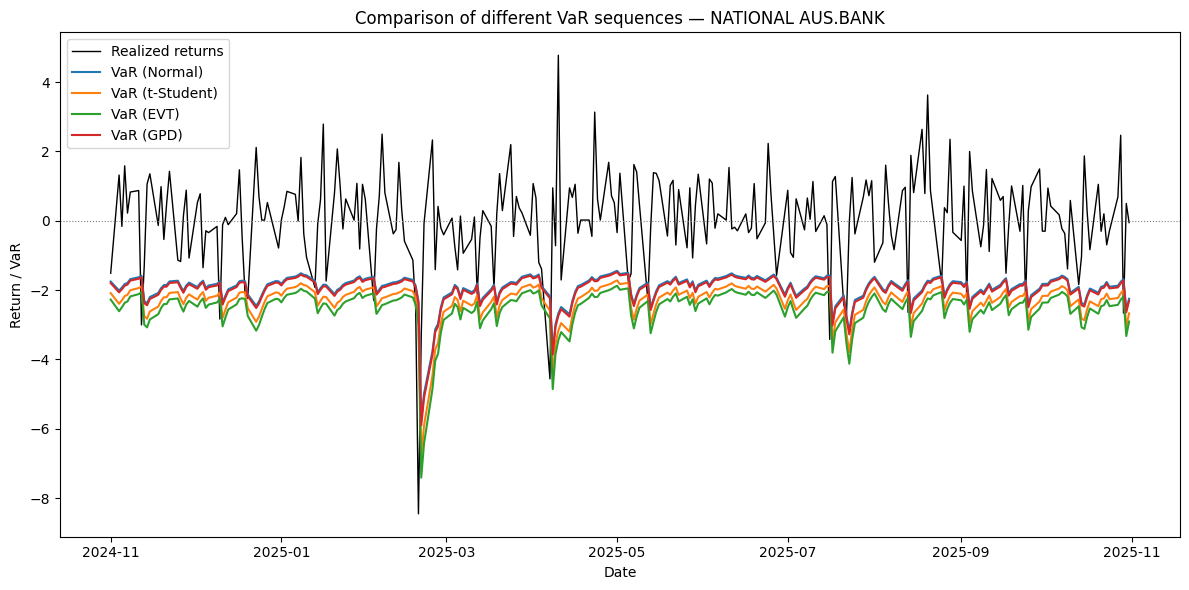

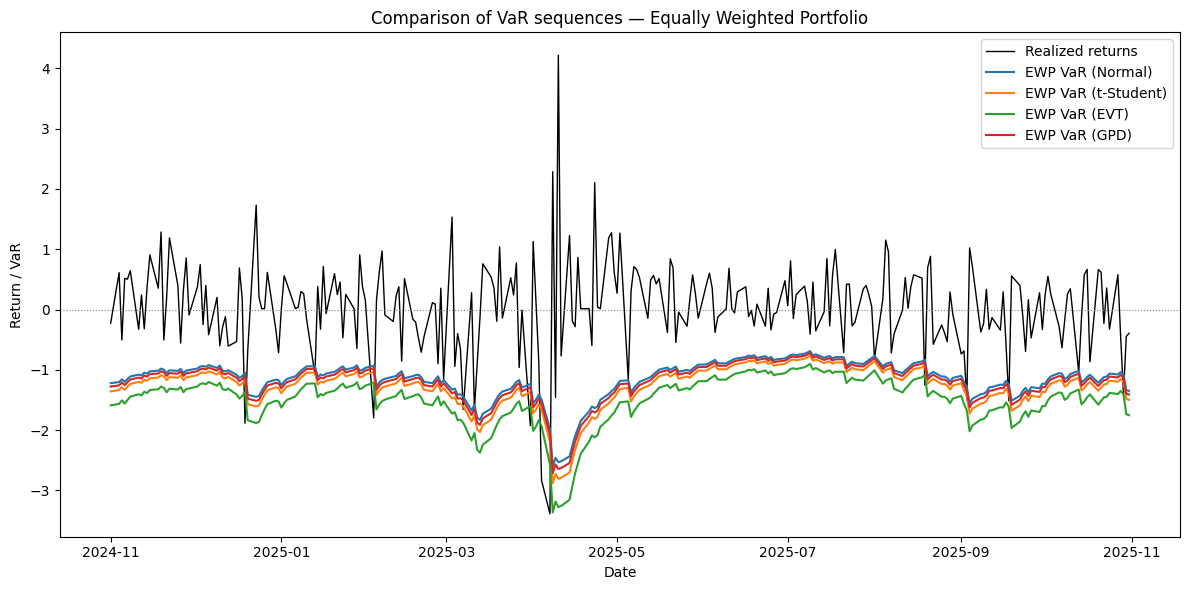

In [ ]:
# ————————————————————————————————————————————————————————————————————————————————
# 8. Graphical and Descriptive Comparison of VaR sequences
# ————————————————————————————————————————————————————————————————————————————————

# Choose one asset and the Equally Weighted Portfolio (EWP)
asset_to_plot = returns_df.columns[0]  # primo asset
alpha = 0.01  # livello di confidenza 1%

# Plot comparison for one asset
plt.figure(figsize=(12, 6))
plt.plot(test[asset_to_plot], color="black", lw=1, label="Realized returns")
plt.plot(-var_norm_asset[asset_to_plot], label="VaR (Normal)") # qui bisogna mettere che prende il nome da asset_to_plot
plt.plot(-var_t_asset[asset_to_plot], label="VaR (t-Student)")
plt.plot(-var_evt_asset[asset_to_plot], label="VaR (EVT)")
plt.plot(-var_gpd_asset[asset_to_plot], label="VaR (GPD)")
plt.axhline(0, color="gray", linestyle=":", lw=0.8)
plt.title(f"Comparison of different VaR sequences — {asset_to_plot}")
plt.xlabel("Date")
plt.ylabel("Return / VaR")
plt.legend()
plt.tight_layout()
plt.show()

# Same for EWP
plt.figure(figsize=(12, 6))
plt.plot(ewp_test, color="black", lw=1, label="Realized returns")
plt.plot(-var_norm_ewp, label="EWP VaR (Normal)")
plt.plot(-var_t_ewp, label="EWP VaR (t-Student)")
plt.plot(-var_evt_ewp, label="EWP VaR (EVT)")
plt.plot(-var_gpd_ewp, label="EWP VaR (GPD)")
plt.axhline(0, color="gray", linestyle=":", lw=0.8)
plt.title("Comparison of VaR sequences — Equally Weighted Portfolio")
plt.xlabel("Date")
plt.ylabel("Return / VaR")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ————————————————————————————————————————————————————————————————————————————————
# Compute descriptive stats: frequency of VaR breaches (return < -VaR)
# ————————————————————————————————————————————————————————————————————————————————
def count_var_breaches(realized: pd.Series, var_series: pd.Series) -> int:
    # Allineamento sicuro degli indici
    realized_aligned, var_aligned = realized.align(var_series, join='inner')
    return (realized_aligned < -var_aligned).sum()

# --- Breach counts per singolo asset ---
breach_summary = {
    "Normal VaR": count_var_breaches(test[asset_to_plot], var_norm_asset[asset_to_plot]),
    "t-Student VaR": count_var_breaches(test[asset_to_plot], var_t_asset[asset_to_plot]),
    "EVT VaR": count_var_breaches(test[asset_to_plot], var_evt_asset[asset_to_plot]),
    "GPD VaR": count_var_breaches(test[asset_to_plot], var_gpd_asset[asset_to_plot])
}

# --- Breach counts per Expected Weighted Portfolio (EWP) ---
breach_summary_ewp = {
    "Normal VaR": count_var_breaches(ewp_test, var_norm_ewp.squeeze()),
    "t-Student VaR": count_var_breaches(ewp_test, var_t_ewp.squeeze()),
    "EVT VaR": count_var_breaches(ewp_test, var_evt_ewp.squeeze()),
    "GPD VaR": count_var_breaches(ewp_test, var_gpd_ewp.squeeze())
}

# --- Stampa dei risultati ---
print(f"\n—— VaR Breach Counts for {asset_to_plot} ——")
print(pd.Series(breach_summary))
print(f"\n—— VaR Breach Counts for EWP ——")
print(pd.Series(breach_summary_ewp))



—— VaR Breach Counts for NATIONAL AUS.BANK ——
Normal VaR       20
t-Student VaR    13
EVT VaR          11
GPD VaR          20
dtype: int64

—— VaR Breach Counts for EWP ——
Normal VaR       14
t-Student VaR    11
EVT VaR           6
GPD VaR          13
dtype: int64


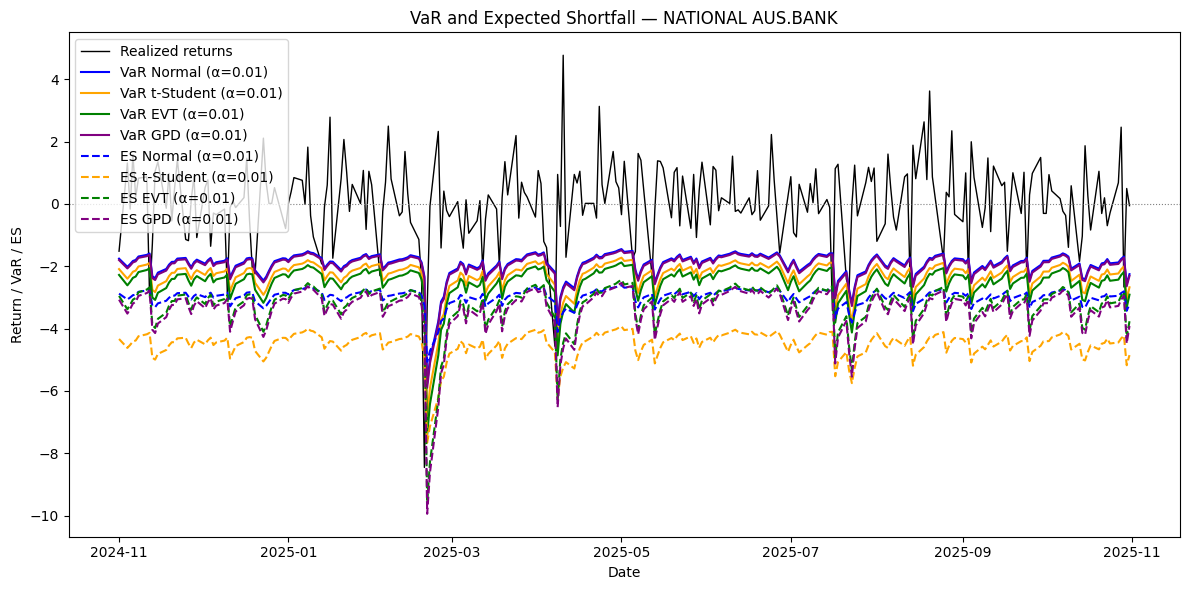


—— Average VaR and ES for NATIONAL AUS.BANK ——
Normal VaR: 1.9507176312491719  | ES: -2.9889039394646764
t-Student VaR: 2.3181843610710917  | ES: -4.508410801474126
EVT VaR: 2.5238085686125262  | ES: -3.2658852316504774
GPD VaR: 2.000397470447108  | ES: -3.3987911870468013


In [ ]:
# ————————————————————————————————————————————————————————————————————————————————
# 9. Expected Shortfall for all VaR models using helper statistics
# ————————————————————————————————————————————————————————————————————————————————

alpha = 0.01
asset = asset_to_plot

# Funzione ES norm e t
def compute_ES(mu, var, alpha=0.01, distribution="normal", df=None):
    s = np.sqrt(var)
    if distribution == "normal":
        q = norm.ppf(alpha)
        return -(mu + s * norm.pdf(q) / alpha)
    elif distribution == "student-t":
        if df is None:
            raise ValueError("df parameter required for Student-t ES")
        c = t.ppf(alpha, df)
        return -(mu + s * ((df + c**2)/(df - 1)) * t.pdf(c, df) / alpha)
    else:
        # fallback: semplicemente VaR come proxy
        return -(mu + s * norm.ppf(alpha))
    
def compute_ES_EVT(qZ_alpha, c, loc, scale):
    """
    qZ_alpha: left-tail residual quantile (negative)
    c, loc, scale: GEV fitted params (genextreme)
    """
    y = -qZ_alpha  # mappo left tail in "losses positive"
    # ES formula teorica per GEV
    if c == 0:
        ES_y = y + scale  # limite Gumbel
    else:
        ES_y = (y - loc + scale)/(1 - c) + loc
    return -ES_y

def compute_ES_GPD(qZ_alpha, xi, beta, u):
    y_alpha = -qZ_alpha
    if xi >= 1.0:
        raise ValueError("ES diverges for xi >= 1")
    ES_y = (y_alpha + beta - xi * u) / (1 - xi)
    return -ES_y


# Calcolo ES per ciascun modello usando helper variables
es_norm = compute_ES(mu_a, sigma_a, alpha, "normal")
es_t = compute_ES(mu_a, sigma_a, alpha, "student-t", df=fit_info[asset]['df_t'])
ES_gev_a  = (mu_a + sigma_a * compute_ES_EVT(qZ_alpha_theta_a, c_a, loc_a, scale_a))
ES_gpd_a  = (mu_a + sigma_a * compute_ES_GPD(qZ_alpha_theta_a, xi_a, beta_a, u_a))

# Plot comparativo
plt.figure(figsize=(12, 6))
plt.plot(test[asset], color="black", lw=1, label="Realized returns")
plt.plot(-var_norm_asset[asset], label=f"VaR Normal (α={alpha})", color="blue")
plt.plot(-var_t_asset[asset], label=f"VaR t-Student (α={alpha})", color="orange")
plt.plot(-var_evt_asset[asset], label=f"VaR EVT (α={alpha})", color="green")
plt.plot(-var_gpd_asset[asset], label=f"VaR GPD (α={alpha})", color="purple")

plt.plot(es_norm, label=f"ES Normal (α={alpha})", color="blue", linestyle="--")
plt.plot(es_t, label=f"ES t-Student (α={alpha})", color="orange", linestyle="--")
plt.plot(ES_gev_a, label=f"ES EVT (α={alpha})", color="green", linestyle="--")
plt.plot(ES_gpd_a, label=f"ES GPD (α={alpha})", color="purple", linestyle="--")

plt.axhline(0, color="gray", linestyle=":", lw=0.8)
plt.title(f"VaR and Expected Shortfall — {asset}")
plt.xlabel("Date")
plt.ylabel("Return / VaR / ES")
plt.legend()
plt.tight_layout()
plt.show()

# Stampa valori medi
print(f"\n—— Average VaR and ES for {asset} ——")
print("Normal VaR:", var_norm_asset[asset].mean(), " | ES:", es_norm.mean())
print("t-Student VaR:", var_t_asset[asset].mean(), " | ES:", es_t.mean())
print("EVT VaR:", var_evt_asset[asset].mean(), " | ES:", ES_gev_a.mean())
print("GPD VaR:", var_gpd_asset[asset].mean(), " | ES:", ES_gpd_a.mean())
